In [16]:
import pickle
import numpy as np
import sys,os
from scipy.sparse import load_npz
from util1 import *

#Upload example data

In [11]:
# An example of neighborhood motif discovery of SMAD5 only using chromosome 2
# To generate inputs in other chromosomes, you can use 'util1.generate_inputs' function with files 
#   'examples/input_sample_poi.pickle' and downloaded reference genome data

with open('examples/input_sample_poi.pickle','rb') as f:
  input_sample_poi=pickle.load(f)
with open('chromatin_feature.pickle','rb') as f:
  chromatin_feature=pickle.load(f)
inputs={}
labels={}
neighs={}
inputs[2]=np.load('examples/chr2.npy')
neighs[2]=np.load('examples/neighbors_chr2.npy')
print(neighs[2].shape,inputs[2].shape)
labels[2]=load_npz('examples/chr2.npz')

(249962, 61) (249962, 4, 1000)


# generate the neighborhood motif for RBFOX2

Notice:
1. There are two criterions to select neighbor sequences for motif discovery. First, the corresponding central sequence should be binding sites with prediction score greater than the set 'score_threshold'. Second, the corresponding chromatin contact should be greater than the set 'contact_threshold'. These two criterions ensures that the binding sites are accurately predicted and the neighbor sequences contribute to the prediciton.
2. If you can not generate enough neighbor sequences for motif discovery, you can either get sequences from multiple chromosomes or set lower thresholds.

In [7]:
# chromatin feature of interest
inspect_tf='RBFOX2'

sequence_grad,sequence_input= filter_sequence(inputs,neighs,labels,input_sample_poi, inspect_tf
                                              ,contact_threshold=0.5, score_threshold=0.3)
# contact_threshold: the threshold to filter contacts with low attribution scores
# score_threshold: the threshold to filter binding sites with low prediction scores
print('The number of selected sequence to generate neighborhood motif is %s'%(sequence_grad.shape[0]))

cuda:0
[614 680]
14390 binding sites are found in chromosome 2
1 neighbor sequences are found
3 neighbor sequences are found
4 neighbor sequences are found
8 neighbor sequences are found
9 neighbor sequences are found
10 neighbor sequences are found
11 neighbor sequences are found
12 neighbor sequences are found
14 neighbor sequences are found
15 neighbor sequences are found
18 neighbor sequences are found
19 neighbor sequences are found
20 neighbor sequences are found
22 neighbor sequences are found
23 neighbor sequences are found
25 neighbor sequences are found
26 neighbor sequences are found
27 neighbor sequences are found
28 neighbor sequences are found
38 neighbor sequences are found
39 neighbor sequences are found
40 neighbor sequences are found
42 neighbor sequences are found
43 neighbor sequences are found
44 neighbor sequences are found
45 neighbor sequences are found
46 neighbor sequences are found
47 neighbor sequences are found
49 neighbor sequences are found
50 neighbor se

#Run TF-MoDISco to generate motifs from neighbor sequences' attribution scores

In [9]:
!pip install modisco
# discover neighborhood patterns with 400 neighbor sequences' attribution scores
import modisco
from collections import OrderedDict
task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()
# print(sequence_grad.shape)
gradient=sequence_grad[:400,:,:]
gradient=np.swapaxes(np.array(gradient),1,2)
input=sequence_input[:400,:,:]
input=np.swapaxes(input,1,2)
tasks=["task0"]
for task in tasks:
    task_to_scores[task] = [gradient[i,:,:]*input[i,:,:] for i in range(gradient.shape[0])]
    task_to_hyp_scores[task] = [gradient[i,:,:] for i in range(gradient.shape[0])]
onehot_data =[input[i,:,:] for i in range(gradient.shape[0])]

     |████████████████████████████████| 215 kB 8.6 MB/s 
     |████████████████████████████████| 1.4 MB 72.3 MB/s 
     |████████████████████████████████| 3.2 MB 64.0 MB/s 
  Created wheel for modisco: filename=modisco-0.5.15.0-py3-none-any.whl size=231925 sha256=b4c341e37f9b45f6b371c6d02d94c8e33c8f90a1018105e1ccf617278528e152
  Stored in directory: /root/.cache/pip/wheels/67/53/04/50094050522f2faf148096dd88651c1674c3c7a619a5c5377a
Successfully built modisco


MEMORY 15.023812608
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= 0.0006240098737180233
Computing threshold
For increasing = True , the minimum IR precision was 0.4699663499274163 occurring at 0.0 implying a frac_neg of 0.8866726666562742
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.13538932438805198 occurring at -1.0803341865539551e-07 implying a frac_neg of 0.15658992909407127
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.17003178596496582  and  0.15866243839263916 with frac passing 0.032415816326530615
Final raw thresholds are -0.17003178596496582  and  0.15866243839263916
Final transformed thresholds are -0.969829081632653  and  0.9655357142857143


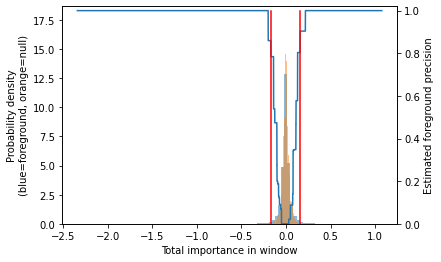

Got 1114 coords
After resolving overlaps, got 1114 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9654357142857143
MEMORY 15.029977088
1114 identified in total
2 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [586, 528]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 15.029977088
On metacluster 1
Metacluster size 528
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 528
(Round 1) Computing coarse affmat
MEMORY 15.030009856
Beginning embedding computation
MEMORY 15.030009856


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   21.6s
[Parallel(n_jobs=4)]: Done 528 out of 528 | elapsed:   26.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done 528 out of 528 | elapsed:   25.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 528 out of 528 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.11639118194580078 s


[Parallel(n_jobs=1)]: Done 528 out of 528 | elapsed:    1.5s finished


Constructing csr matrix...
csr matrix made in 0.11211156845092773 s
Finished embedding computation in 55.02 s
MEMORY 15.104499712
Starting affinity matrix computations
MEMORY 15.104499712
Batching in slices of size 528


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

Finished affinity matrix computations in 1.66 s
MEMORY 15.103864832
(Round 1) Computed coarse affmat
MEMORY 15.102291968
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 15.102291968
Launching nearest neighbors affmat calculation job
MEMORY 15.102291968


Parallel runs completed
MEMORY 15.102091264
Job completed in: 5.38 s
MEMORY 15.101845504
Launching nearest neighbors affmat calculation job
MEMORY 15.101845504
Parallel runs completed
MEMORY 15.10182912
Job completed in: 5.38 s
MEMORY 15.101591552
(Round 1) Computed affinity matrix on nearest neighbors in 10.94 s
MEMORY 15.101075456
Filtered down to 523 of 528
(Round 1) Retained 523 rows out of 528 after filtering
MEMORY 15.100956672
(Round 1) Computing density adapted affmat
MEMORY 15.100956672
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 15.099686912
Beginning preprocessing + Leiden
Affmat shape: 523


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.4s


Quality: 0.01874656943513415
Quality: 0.018760888173610834
Quality: 0.018765454875237498
Got 5 clusters after round 1
Counts:
{0: 195, 1: 124, 4: 47, 2: 109, 3: 48}
MEMORY 15.099838464
(Round 1) Aggregating seqlets in each cluster
MEMORY 15.099838464
Aggregating for cluster 0 with 195 seqlets
MEMORY 15.099838464


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   12.2s finished


Removed 1 duplicate seqlets
Skipped 19 due to duplicates
Trimming eliminated 0 seqlets out of 175
Aggregating for cluster 1 with 124 seqlets
MEMORY 15.09957632
Removed 2 duplicate seqlets
Skipped 14 due to duplicates
Trimming eliminated 0 seqlets out of 108
Aggregating for cluster 2 with 109 seqlets
MEMORY 15.09957632
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 108
Aggregating for cluster 3 with 48 seqlets
MEMORY 15.09957632
Skipped 2 due to duplicates
Trimming eliminated 0 seqlets out of 46
Aggregating for cluster 4 with 47 seqlets
MEMORY 15.09957632
Trimming eliminated 0 seqlets out of 47
(Round 2) num seqlets: 484
(Round 2) Computing coarse affmat
MEMORY 15.09957632
Beginning embedding computation
MEMORY 15.09957632


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   33.8s
[Parallel(n_jobs=4)]: Done 484 out of 484 | elapsed:   36.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   33.9s
[Parallel(n_jobs=4)]: Done 484 out of 484 | elapsed:   36.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 484 out of 484 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.10366630554199219 s


[Parallel(n_jobs=1)]: Done 484 out of 484 | elapsed:    1.4s finished


Constructing csr matrix...
csr matrix made in 0.10345625877380371 s
Finished embedding computation in 76.96 s
MEMORY 15.137161216
Starting affinity matrix computations
MEMORY 15.137161216
Batching in slices of size 484


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

Finished affinity matrix computations in 1.62 s
MEMORY 15.136374784
(Round 2) Computed coarse affmat
MEMORY 15.134539776
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 15.134539776
Launching nearest neighbors affmat calculation job
MEMORY 15.134539776


Parallel runs completed
MEMORY 15.134539776
Job completed in: 3.59 s
MEMORY 15.134015488
Launching nearest neighbors affmat calculation job
MEMORY 15.134015488
Parallel runs completed
MEMORY 15.133990912
Job completed in: 4.69 s
MEMORY 15.133753344
(Round 2) Computed affinity matrix on nearest neighbors in 8.46 s
MEMORY 15.133753344
Not applying filtering for rounds above first round
MEMORY 15.133753344
(Round 2) Computing density adapted affmat
MEMORY 15.133753344
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 15.133171712
Beginning preprocessing + Leiden
Affmat shape: 484


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.9s


Quality: 0.021697405556065162
Quality: 0.02170028370100952
Quality: 0.021732361166756593
Got 5 clusters after round 2
Counts:
{0: 172, 1: 120, 3: 92, 2: 98, 4: 2}
MEMORY 15.133175808
(Round 2) Aggregating seqlets in each cluster
MEMORY 15.133175808
Aggregating for cluster 0 with 172 seqlets
MEMORY 15.133175808


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   10.4s finished


Skipped 5 due to duplicates
Trimming eliminated 0 seqlets out of 167
Aggregating for cluster 1 with 120 seqlets
MEMORY 15.133175808
Skipped 4 due to duplicates
Trimming eliminated 0 seqlets out of 116
Aggregating for cluster 2 with 98 seqlets
MEMORY 15.133175808
Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 95
Aggregating for cluster 3 with 92 seqlets
MEMORY 15.133175808
Skipped 14 due to duplicates
Trimming eliminated 0 seqlets out of 78
Aggregating for cluster 4 with 2 seqlets
MEMORY 15.133175808
Trimming eliminated 0 seqlets out of 2
Got 5 clusters
Splitting into subclusters...
MEMORY 15.133175808
Inspecting pattern 0 for spurious merging
[t-SNE] Computed conditional probabilities for sample 167 / 167
[t-SNE] Mean sigma: 0.512012


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 167 out of 167 | elapsed:    0.1s finished


Beginning preprocessing + Leiden
Affmat shape: 167


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s


Quality: 0.36967043642078024
Got subclusters: Counter({0: 47, 1: 45, 2: 28, 3: 26, 4: 16, 5: 5})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.0s finished


Numbers for each pattern pre-subsample: [47, 45, 28, 26, 16, 5]
Numbers after subsampling: [47, 45, 28, 26, 16, 5]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.3305962085723877 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.3007364273071289 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.23063230514526367 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.21090030670166016 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.14303827285766602 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.08290767669677734 s
Cluster sizes
[47 45 28 26 16  5]
Cross-contamination matrix:
[[1.   0.24 0.25 0.21 0.25 0.21]
 [0.59 1.   0.43 0.32 0.49 0.4 ]
 [0.67 0.49 1.   0.46 0.36 0.4 ]
 [0.64 0.38 0.47 1.   0.62 0.25]
 [0.77 0.62 0.39 0.67 1.   0.32]
 [0.61 0.57 0.42 0.26 0.31 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.62 0.6  0.56 0.57 0.51]
 [0.62 1.   0.52 0.45 0.61 0.62]
 [0.6  0.52 1.   0.49 0.39 0.45]
 [0.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 102 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 116 out of 116 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 116


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s


Quality: 0.2268639350949473
Quality: 0.22835715892451008
Quality: 0.22844696327474434
Quality: 0.22853653153060796
Got subclusters: Counter({0: 32, 1: 27, 2: 22, 3: 17, 4: 11, 5: 5, 6: 2})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.8s finished


Numbers for each pattern pre-subsample: [32, 27, 22, 17, 11, 5, 2]
Numbers after subsampling: [32, 27, 22, 17, 11, 5, 2]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.32462310791015625 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.2590489387512207 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.23858952522277832 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.17243456840515137 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.15339136123657227 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.0850837230682373 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.05855202674865723 s
Cluster sizes
[32 27 22 17 11  5  2]
Cross-contamination matrix:
[[1.   0.47 0.44 0.41 0.68 0.2  0.91]
 [0.74 1.   0.53 0.32 0.76 0.33 0.75]
 [0.95 0.78 1.   0.58 0.9  0.55 0.83]
 [0.71 0.37 0.45 1.   0.57 0.76 0.65]
 [0.73 0.46 0.39 0.23 1.   0.12 0.93]
 [0.1  0.12 0.1  0.33 0.11 1.   0.02]
 [0.   0.   0.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  95 out of  95 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 95


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s


Quality: 0.20160240471611277
Got subclusters: Counter({0: 32, 1: 22, 2: 19, 3: 11, 4: 11})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.7s finished


Numbers for each pattern pre-subsample: [32, 22, 19, 11, 11]
Numbers after subsampling: [32, 22, 19, 11, 11]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.20874476432800293 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.15809845924377441 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.13782095909118652 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.10254287719726562 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.09868359565734863 s
Cluster sizes
[32 22 19 11 11]
Cross-contamination matrix:
[[1.   0.33 0.38 0.28 0.1 ]
 [0.89 1.   0.7  0.54 0.44]
 [0.69 0.47 1.   0.51 0.33]
 [0.76 0.55 0.78 1.   0.31]
 [0.34 0.44 0.51 0.3  1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.44 0.35 0.31 0.28]
 [0.44 1.   0.44 0.32 0.29]
 [0.35 0.44 1.   0.45 0.35]
 [0.31 0.32 0.45 1.   0.17]
 [0.28 0.29 0.35 0.17 1.  ]]
Inspecting pattern 3 for spurious merging
[t-SNE] Computed conditional probabilities for sample 78 / 78
[t-SN

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  78 out of  78 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s


Quality: 0.19488899687757053
Quality: 0.19530765696924524
Got subclusters: Counter({0: 33, 1: 22, 2: 17, 3: 6})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.7s finished


Numbers for each pattern pre-subsample: [33, 22, 17, 6]
Numbers after subsampling: [33, 22, 17, 6]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.17164993286132812 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.12613987922668457 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.0918726921081543 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.047937631607055664 s
Cluster sizes
[33 22 17  6]
Cross-contamination matrix:
[[1.   0.39 0.52 0.55]
 [0.33 1.   0.22 0.22]
 [0.91 0.54 1.   0.76]
 [0.69 0.22 0.51 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.69 0.73 0.64]
 [0.69 1.   0.57 0.53]
 [0.73 0.57 1.   0.61]
 [0.64 0.53 0.61 1.  ]]
Inspecting pattern 4 for spurious merging
Merging on 23 clusters
MEMORY 15.13330688
On merging iteration 1
Numbers for each pattern pre-subsample: [47, 45, 28, 26, 16, 5, 32, 27, 22, 17, 11, 5, 2, 32, 22, 19, 11, 11, 33, 22, 17, 6, 2]
Numbers after subsampling: [47, 45, 28, 26, 16, 5, 32, 27, 22, 17

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  49 out of  49 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Iteration 700: error = 0.6102042, gradient norm = 0.0000235 (50 iterations in 0.013s)
[t-SNE] Iteration 750: error = 0.6101974, gradient norm = 0.0000415 (50 iterations in 0.012s)
[t-SNE] Iteration 800: error = 0.6087196, gradient norm = 0.0000690 (50 iterations in 0.009s)
[t-SNE] Iteration 850: error = 0.6081536, gradient norm = 0.0000714 (50 iterations in 0.009s)
[t-SNE] Iteration 900: error = 0.6080519, gradient norm = 0.0001080 (50 iterations in 0.009s)
[t-SNE] Iteration 950: error = 0.6083438, gradient norm = 0.0000815 (50 iterations in 0.009s)
[t-SNE] Iteration 1000: error = 0.6057457, gradient norm = 0.0001755 (50 iterations in 0.009s)
[t-SNE] KL divergence after 1000 iterations: 0.605746
[t-SNE] Computed conditional probabilities for sample 49 / 49
[t-SNE] Mean sigma: 1125899906842624.000000
Beginning preprocessing + Leiden
Affmat shape: 49


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 2.4868995751602976e-13


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  47 out of  47 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 49})
On pattern 1
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 47 samples in 0.001s...
[t-SNE] Computed neighbors for 47 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 47 / 47
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 44.6532364, gradient norm = 0.6214333 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 42.8034668, gradient norm = 0.6475692 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 42.5905075, gradient norm = 0.3843959 (50 iterations in 0.010s)
[t-SNE] Iteration 200: error = 48.3142128, gradient norm = 0.3988540 (50 iterations in 0.010s)
[t-SNE] Iteration 250: error = 41.6153946, gradient norm = 0.5752616 (50 iterations in 0.010s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.615395
[t-SNE] Iteration 300: error = 0.7814294, gradient norm = 0.0012503 (50 iterations in 0.009s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 5.684341886081034e-14


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 47})
On pattern 2
[t-SNE] Computing 44 nearest neighbors...
[t-SNE] Indexed 45 samples in 0.001s...
[t-SNE] Computed neighbors for 45 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 45 / 45
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 49.4132118, gradient norm = 0.3649440 (50 iterations in 0.012s)
[t-SNE] Iteration 100: error = 43.2783203, gradient norm = 0.4182964 (50 iterations in 0.011s)
[t-SNE] Iteration 150: error = 48.2020187, gradient norm = 0.6657472 (50 iterations in 0.009s)
[t-SNE] Iteration 200: error = 42.3871765, gradient norm = 0.5487152 (50 iterations in 0.009s)
[t-SNE] Iteration 250: error = 45.2206612, gradient norm = 0.5526590 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.220661
[t-SNE] Iteration 300: error = 0.7855160, gradient norm = 0.0010573 (50 iterations in 0.009s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: -1.6509016376176883e-13
Got subclusters: Counter({0: 45})
On pattern 3
[t-SNE] Computing 32 nearest neighbors...
[t-SNE] Indexed 33 samples in 0.001s...
[t-SNE] Computed neighbors for 33 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 33 / 33
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 48.5405807, gradient norm = 0.4377354 (50 iterations in 0.007s)
[t-SNE] Iteration 100: error = 45.3991241, gradient norm = 0.5557608 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 44.4410095, gradient norm = 0.3995883 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 44.2869720, gradient norm = 0.5348366 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 44.4692764, gradient norm = 0.5517282 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.469276
[t-SNE] Iteration 300: error = 0.6880251, gradient norm = 0.0010766 (50 

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 out of  33 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Affmat shape: 33


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: -7.105427357600852e-15


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 33})
On pattern 4
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.001s...
[t-SNE] Computed neighbors for 32 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 45.0391502, gradient norm = 0.5915984 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 41.5301819, gradient norm = 0.6421952 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 41.7794228, gradient norm = 0.5639641 (50 iterations in 0.010s)
[t-SNE] Iteration 200: error = 42.5937386, gradient norm = 0.5189880 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 48.9627533, gradient norm = 0.4000197 (50 iterations in 0.010s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.962753
[t-SNE] Iteration 300: error = 0.5347084, gradient norm = 0.0006481 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 2.0650148258028073e-14


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 32})
On pattern 5
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.001s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 45.0391502, gradient norm = 0.5915984 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 41.5301819, gradient norm = 0.6421952 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 41.7794228, gradient norm = 0.5639641 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 42.5937386, gradient norm = 0.5189880 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 48.9627533, gradient norm = 0.4000197 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.962753
[t-SNE] Iteration 300: error = 0.5347084, gradient norm = 0.0006481 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 2.0650148258028073e-14
Got subclusters: Counter({0: 32})
On metacluster 0
Metacluster size 586
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 586
(Round 1) Computing coarse affmat
MEMORY 15.133503488
Beginning embedding computation
MEMORY 15.133503488


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 586 out of 586 | elapsed:   27.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done 586 out of 586 | elapsed:   27.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 586 out of 586 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.12480640411376953 s


[Parallel(n_jobs=1)]: Done 586 out of 586 | elapsed:    1.7s finished


Constructing csr matrix...
csr matrix made in 0.13171935081481934 s
Finished embedding computation in 58.94 s
MEMORY 15.157338112
Starting affinity matrix computations
MEMORY 15.157338112
Batching in slices of size 586


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

Finished affinity matrix computations in 1.47 s
MEMORY 15.156822016
(Round 1) Computed coarse affmat
MEMORY 15.15577344
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 15.15577344
Launching nearest neighbors affmat calculation job
MEMORY 15.15577344


Parallel runs completed
MEMORY 15.154966528
Job completed in: 7.01 s
MEMORY 15.154204672
Launching nearest neighbors affmat calculation job
MEMORY 15.154204672
Parallel runs completed
MEMORY 15.154180096
Job completed in: 6.9 s
MEMORY 15.154180096
(Round 1) Computed affinity matrix on nearest neighbors in 14.11 s
MEMORY 15.15409408
Filtered down to 573 of 586
(Round 1) Retained 573 rows out of 586 after filtering
MEMORY 15.153831936
(Round 1) Computing density adapted affmat
MEMORY 15.153831936
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 15.151726592
Beginning preprocessing + Leiden
Affmat shape: 573


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.6s


Quality: 0.02229312676872823
Quality: 0.022293538437609572
Quality: 0.022295103543819406
Got 4 clusters after round 1
Counts:
{1: 170, 0: 244, 2: 105, 3: 54}
MEMORY 15.151726592
(Round 1) Aggregating seqlets in each cluster
MEMORY 15.151726592
Aggregating for cluster 0 with 244 seqlets
MEMORY 15.151726592


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   12.3s finished


Removed 1 duplicate seqlets
Skipped 1 seqlets that went over sequence edge during flank expansion
Skipped 7 due to duplicates
Trimming eliminated 0 seqlets out of 235
Aggregating for cluster 1 with 170 seqlets
MEMORY 15.151505408
Removed 2 duplicate seqlets
Skipped 17 due to duplicates
Trimming eliminated 0 seqlets out of 151
Aggregating for cluster 2 with 105 seqlets
MEMORY 15.151505408
Skipped 13 due to duplicates
Trimming eliminated 0 seqlets out of 92
Aggregating for cluster 3 with 54 seqlets
MEMORY 15.151505408
Skipped 5 due to duplicates
Trimming eliminated 0 seqlets out of 49
(Round 2) num seqlets: 526
(Round 2) Computing coarse affmat
MEMORY 15.151505408
Beginning embedding computation
MEMORY 15.151505408


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   35.1s
[Parallel(n_jobs=4)]: Done 526 out of 526 | elapsed:   41.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   34.5s
[Parallel(n_jobs=4)]: Done 526 out of 526 | elapsed:   40.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 526 out of 526 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.11565899848937988 s


[Parallel(n_jobs=1)]: Done 526 out of 526 | elapsed:    1.5s finished


Constructing csr matrix...
csr matrix made in 0.11170578002929688 s
Finished embedding computation in 84.94 s
MEMORY 15.169368064
Starting affinity matrix computations
MEMORY 15.169368064
Batching in slices of size 526


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

Finished affinity matrix computations in 1.45 s
MEMORY 15.169368064
(Round 2) Computed coarse affmat
MEMORY 15.167533056
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 15.167533056
Launching nearest neighbors affmat calculation job
MEMORY 15.167533056


Parallel runs completed
MEMORY 15.16750848
Job completed in: 5.2 s
MEMORY 15.16648448
Launching nearest neighbors affmat calculation job
MEMORY 15.16648448
Parallel runs completed
MEMORY 15.166459904
Job completed in: 6.03 s
MEMORY 15.166459904
(Round 2) Computed affinity matrix on nearest neighbors in 11.43 s
MEMORY 15.166459904
Not applying filtering for rounds above first round
MEMORY 15.166459904
(Round 2) Computing density adapted affmat
MEMORY 15.166459904
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 15.165763584
Beginning preprocessing + Leiden
Affmat shape: 526


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.7s


Quality: 0.02017057941485092
Quality: 0.020450294543899017
Got 5 clusters after round 2
Counts:
{0: 208, 1: 138, 4: 37, 3: 61, 2: 82}
MEMORY 15.16550144
(Round 2) Aggregating seqlets in each cluster
MEMORY 15.16550144
Aggregating for cluster 0 with 208 seqlets
MEMORY 15.16550144


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   11.2s finished


Skipped 8 due to duplicates
Trimming eliminated 0 seqlets out of 200
Removed 1 duplicate seqlets
Aggregating for cluster 1 with 138 seqlets
MEMORY 15.16550144
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 137
Aggregating for cluster 2 with 82 seqlets
MEMORY 15.16550144
Skipped 6 due to duplicates
Trimming eliminated 0 seqlets out of 76
Aggregating for cluster 3 with 61 seqlets
MEMORY 15.16550144
Skipped 5 due to duplicates
Trimming eliminated 0 seqlets out of 56
Aggregating for cluster 4 with 37 seqlets
MEMORY 15.16550144
Skipped 2 due to duplicates
Trimming eliminated 0 seqlets out of 35
Got 5 clusters
Splitting into subclusters...
MEMORY 15.16550144
Inspecting pattern 0 for spurious merging
[t-SNE] Computed conditional probabilities for sample 199 / 199
[t-SNE] Mean sigma: 0.512986


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 199 out of 199 | elapsed:    0.1s finished


Beginning preprocessing + Leiden
Affmat shape: 199


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s


Quality: 0.3094950632061129
Quality: 0.30978165874799907
Got subclusters: Counter({0: 53, 1: 45, 2: 31, 3: 30, 4: 24, 5: 16})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.3s finished


Numbers for each pattern pre-subsample: [53, 45, 31, 30, 24, 16]
Numbers after subsampling: [53, 45, 31, 30, 24, 16]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.4057934284210205 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.3109700679779053 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.2719721794128418 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.2579944133758545 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.21425771713256836 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.15354537963867188 s
Cluster sizes
[53 45 31 30 24 16]
Cross-contamination matrix:
[[1.   0.47 0.65 0.31 0.43 0.56]
 [0.7  1.   0.72 0.64 0.65 0.63]
 [0.63 0.49 1.   0.38 0.51 0.44]
 [0.58 0.86 0.81 1.   0.64 0.85]
 [0.61 0.59 0.67 0.35 1.   0.54]
 [0.68 0.5  0.52 0.48 0.49 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.46 0.58 0.29 0.41 0.58]
 [0.46 1.   0.48 0.47 0.52 0.43]
 [0.58 0.48 1.   0.42 0.48 0.39]
 [0.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 137 out of 137 | elapsed:    0.1s finished


[t-SNE] Computed conditional probabilities for sample 137 / 137
[t-SNE] Mean sigma: 0.595140
Beginning preprocessing + Leiden
Affmat shape: 137


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.4s


Quality: 0.3596626450193484
Quality: 0.3602918060430578
Got subclusters: Counter({0: 36, 1: 29, 2: 27, 3: 24, 4: 18, 5: 3})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.9s finished


Numbers for each pattern pre-subsample: [36, 29, 27, 24, 18, 3]
Numbers after subsampling: [36, 29, 27, 24, 18, 3]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.3152804374694824 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.23915719985961914 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.20962238311767578 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.19166040420532227 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.1633133888244629 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.055394887924194336 s
Cluster sizes
[36 29 27 24 18  3]
Cross-contamination matrix:
[[1.   0.71 0.59 0.52 0.77 0.79]
 [0.62 1.   0.8  0.47 0.67 0.78]
 [0.19 0.31 1.   0.11 0.14 0.28]
 [0.5  0.56 0.43 1.   0.75 0.9 ]
 [0.2  0.16 0.05 0.14 1.   1.  ]
 [0.03 0.01 0.   0.04 0.44 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.62 0.46 0.48 0.58 0.49]
 [0.62 1.   0.71 0.49 0.55 0.49]
 [0.46 0.71 1.   0.37 0.43 0.43]
 [0

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 out of  76 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 0.18349050694814273
Quality: 0.18353797703933236
Got subclusters: Counter({0: 32, 1: 31, 2: 6, 3: 4, 4: 3})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished


Numbers for each pattern pre-subsample: [32, 31, 6, 4, 3]
Numbers after subsampling: [32, 31, 6, 4, 3]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.20777273178100586 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.20328164100646973 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.07030081748962402 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.05610775947570801 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.047611236572265625 s
Cluster sizes
[32 31  6  4  3]
Cross-contamination matrix:
[[1.   0.78 0.92 0.51 0.22]
 [0.77 1.   0.94 0.47 0.12]
 [0.18 0.16 1.   0.05 0.  ]
 [0.21 0.39 0.34 1.   0.06]
 [0.16 0.17 0.27 0.07 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.77 0.68 0.51 0.31]
 [0.77 1.   0.64 0.6  0.41]
 [0.68 0.64 1.   0.49 0.35]
 [0.51 0.6  0.49 1.   0.34]
 [0.31 0.41 0.35 0.34 1.  ]]
Inspecting pattern 3 for spurious merging
[t-SNE] Computed conditional probabilities for sample 56 / 56
[t-SNE] Me

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 out of  56 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 56


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 0.04949291033782622
Got subclusters: Counter({0: 20, 1: 18, 2: 18})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished


Numbers for each pattern pre-subsample: [20, 18, 18]
Numbers after subsampling: [20, 18, 18]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.07766294479370117 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.0632483959197998 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.06871747970581055 s
Cluster sizes
[20 18 18]
Cross-contamination matrix:
[[1.   0.51 0.31]
 [0.93 1.   0.5 ]
 [0.93 0.72 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.88 0.77]
 [0.88 1.   0.67]
 [0.77 0.67 1.  ]]
Collapsing 0 & 1 with crosscontam 0.5066944444444446 and sim 0.8769262400867189
Trimming eliminated 0 seqlets out of 38
Unmerged patterns remapping: OrderedDict([(2, 1)])
Time spent on merging iteration: 0.12292957305908203
On merging iteration 2
Numbers for each pattern pre-subsample: [38, 18]
Numbers after subsampling: [38, 18]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.07199454307556152 s
Computing sims for pattern 1
Computed sims for pattern

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  53 out of  53 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Iteration 700: error = 0.6252512, gradient norm = 0.0000557 (50 iterations in 0.017s)
[t-SNE] Iteration 750: error = 0.6239119, gradient norm = 0.0000366 (50 iterations in 0.010s)
[t-SNE] Iteration 800: error = 0.6220356, gradient norm = 0.0000540 (50 iterations in 0.010s)
[t-SNE] Iteration 850: error = 0.6203864, gradient norm = 0.0000354 (50 iterations in 0.010s)
[t-SNE] Iteration 900: error = 0.6198159, gradient norm = 0.0000351 (50 iterations in 0.012s)
[t-SNE] Iteration 950: error = 0.6173901, gradient norm = 0.0000553 (50 iterations in 0.010s)
[t-SNE] Iteration 1000: error = 0.6156181, gradient norm = 0.0000699 (50 iterations in 0.010s)
[t-SNE] KL divergence after 1000 iterations: 0.615618
[t-SNE] Computed conditional probabilities for sample 53 / 53
[t-SNE] Mean sigma: 1.337762
Beginning preprocessing + Leiden
Affmat shape: 53


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 0.03238772670051294
Quality: 0.03267319606702975
Quality: 0.033527283535266024


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 27, 1: 26})
On pattern 1
[t-SNE] Computing 44 nearest neighbors...
[t-SNE] Indexed 45 samples in 0.001s...
[t-SNE] Computed neighbors for 45 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 45 / 45
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 49.4132118, gradient norm = 0.3649440 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 43.2783203, gradient norm = 0.4182964 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 48.2020187, gradient norm = 0.6657472 (50 iterations in 0.009s)
[t-SNE] Iteration 200: error = 42.3871765, gradient norm = 0.5487152 (50 iterations in 0.009s)
[t-SNE] Iteration 250: error = 45.2206612, gradient norm = 0.5526590 (50 iterations in 0.010s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.220661
[t-SNE] Iteration 300: error = 0.7855160, gradient norm = 0.0010573 (50 iterations in 0.010s)
[t-S

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: -1.6509016376176883e-13


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  38 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 45})
On pattern 2
[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 38 samples in 0.001s...
[t-SNE] Computed neighbors for 38 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 38 / 38
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 42.6402855, gradient norm = 0.5205165 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 47.5809174, gradient norm = 0.4590867 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 46.8631210, gradient norm = 0.4692783 (50 iterations in 0.010s)
[t-SNE] Iteration 200: error = 46.3814278, gradient norm = 0.4031166 (50 iterations in 0.010s)
[t-SNE] Iteration 250: error = 42.7903252, gradient norm = 0.5435238 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.790325
[t-SNE] Iteration 300: error = 0.6839279, gradient norm = 0.0011233 (50 iterations in 0.010s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: -1.4643841694806183e-13


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 38})
On pattern 3
[t-SNE] Computing 35 nearest neighbors...
[t-SNE] Indexed 36 samples in 0.001s...
[t-SNE] Computed neighbors for 36 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 36 / 36
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 41.3067818, gradient norm = 0.6176358 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 44.3795395, gradient norm = 0.4343556 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 46.3726425, gradient norm = 0.4643035 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 46.0226593, gradient norm = 0.5551184 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 41.2612839, gradient norm = 0.4272834 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.261284
[t-SNE] Iteration 300: error = 0.6283596, gradient norm = 0.0009790 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 2.2204460492503205e-16


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 36})
On pattern 4
[t-SNE] Computing 34 nearest neighbors...
[t-SNE] Indexed 35 samples in 0.001s...
[t-SNE] Computed neighbors for 35 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 35 / 35
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 48.4966507, gradient norm = 0.4108260 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 44.2089005, gradient norm = 0.4202695 (50 iterations in 0.011s)
[t-SNE] Iteration 150: error = 42.6509895, gradient norm = 0.7259827 (50 iterations in 0.009s)
[t-SNE] Iteration 200: error = 42.0808487, gradient norm = 0.7061996 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 43.0933266, gradient norm = 0.5469246 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.093327
[t-SNE] Iteration 300: error = 0.8960158, gradient norm = 0.0014843 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 2.2204460492503205e-16


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 35})
On pattern 5
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.001s...
[t-SNE] Computed neighbors for 32 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 45.0391502, gradient norm = 0.5915984 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 41.5301819, gradient norm = 0.6421952 (50 iterations in 0.010s)
[t-SNE] Iteration 150: error = 41.7794228, gradient norm = 0.5639641 (50 iterations in 0.010s)
[t-SNE] Iteration 200: error = 42.5937386, gradient norm = 0.5189880 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 48.9627533, gradient norm = 0.4000197 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.962753
[t-SNE] Iteration 300: error = 0.5347084, gradient norm = 0.0006481 (50 iterations in 0.009s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 2.0650148258028073e-14


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  31 out of  31 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 32})
On pattern 6
[t-SNE] Computing 30 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.001s...
[t-SNE] Computed neighbors for 31 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 44.0677071, gradient norm = 0.6664385 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 44.3436432, gradient norm = 0.4917835 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 45.2626801, gradient norm = 0.4731013 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 42.3066177, gradient norm = 0.4319640 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 42.6013489, gradient norm = 0.7314947 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.601349
[t-SNE] Iteration 300: error = 0.7107455, gradient norm = 0.0011175 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 9.703349235223737e-14


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  31 out of  31 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 31})
On pattern 7
[t-SNE] Computing 30 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.001s...
[t-SNE] Computed neighbors for 31 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 44.0677071, gradient norm = 0.6664385 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 44.3436432, gradient norm = 0.4917835 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 45.2626801, gradient norm = 0.4731013 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 42.3066177, gradient norm = 0.4319640 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 42.6013489, gradient norm = 0.7314947 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.601349
[t-SNE] Iteration 300: error = 0.7107455, gradient norm = 0.0011175 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 9.703349235223737e-14


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 31})
On pattern 8
[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.001s...
[t-SNE] Computed neighbors for 30 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 43.2136307, gradient norm = 0.3478597 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 44.5518341, gradient norm = 0.6739807 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 43.4177322, gradient norm = 0.7131931 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 41.6086578, gradient norm = 0.7720285 (50 iterations in 0.007s)
[t-SNE] Iteration 250: error = 44.0026703, gradient norm = 0.6494718 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.002670
[t-SNE] Iteration 300: error = 0.5412546, gradient norm = 0.0008786 (50 iterations in 0.007s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 1.9095836023552904e-14
Got subclusters: Counter({0: 30})


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished


In [10]:
import numpy as np
%matplotlib inline
import modisco

null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                    #Slight modifications from the default settings
                    sliding_window_size=21,
                    flank_size=5,
                    target_seqlet_fdr=0.15,
                    seqlets_to_patterns_factory=
                     modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        #Note: as of version 0.5.6.0, it's possible to use the results of a motif discovery
                        # software like MEME to improve the TF-MoDISco clustering. To use the meme-based
                        # initialization, you would specify the initclusterer_factory as shown in the
                        # commented-out code below:
                        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
                        #    meme_command="meme", base_outdir="meme_out",            
                        #    max_num_seqlets_to_use=10000, nmotifs=10, n_jobs=1),
                        trim_to_window_size=15,
                        initial_flank_to_add=5,
                        final_min_cluster_size=30)
                )(
                 task_names=["task0"],#, "task1", "task2"],
                 contrib_scores=task_to_scores,
                 hypothetical_contribs=task_to_hyp_scores,
                 one_hot=onehot_data,
                 null_per_pos_scores = null_per_pos_scores)

In [12]:
import h5py
import modisco.util
from importlib import reload
reload(modisco.util)
![[ -e results.hdf5 ]] && rm results.hdf5
grp = h5py.File("results.hdf5", "w")
tfmodisco_results.save_hdf5(grp)
grp.close()

Metaclusters heatmap


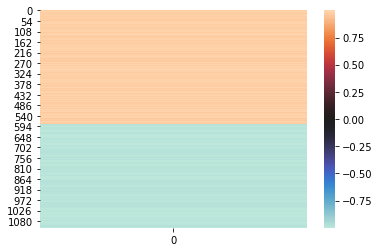

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 49
Task 0 hypothetical scores:


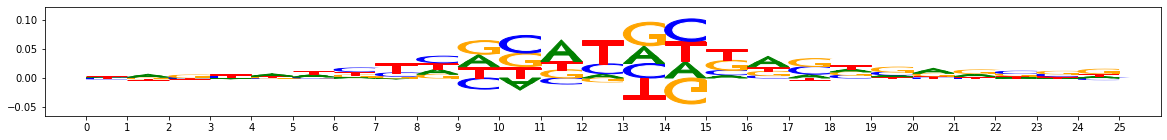

Task 0 actual importance scores:


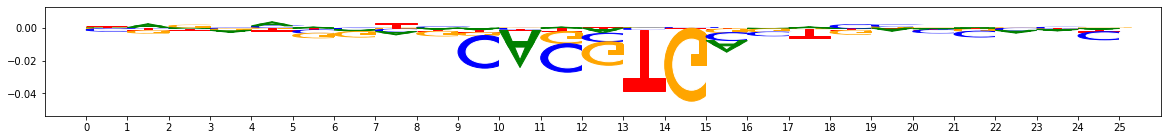

onehot, fwd and rev:


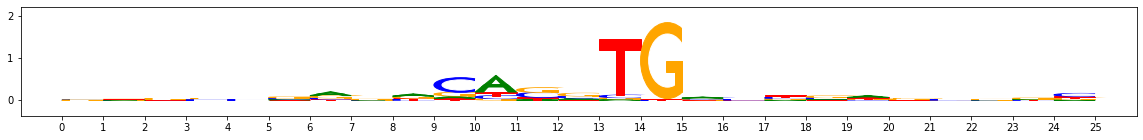

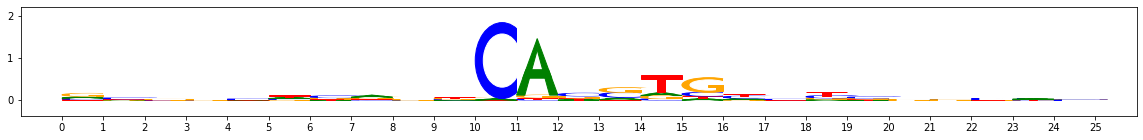

PLOTTING SUBCLUSTERS


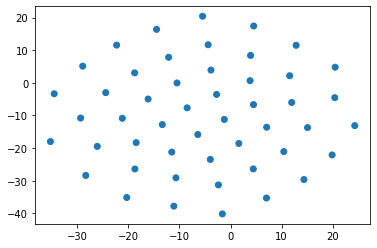

subcluster_0 size 49


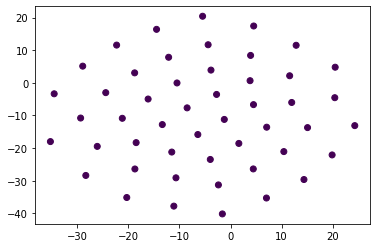

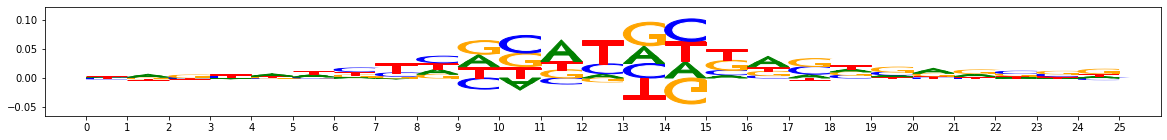

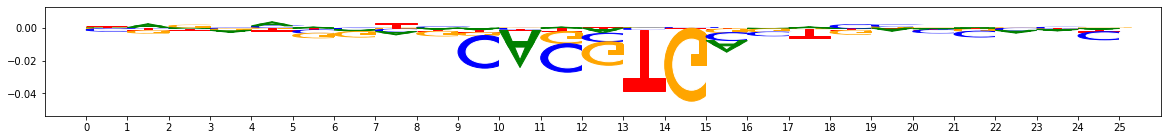

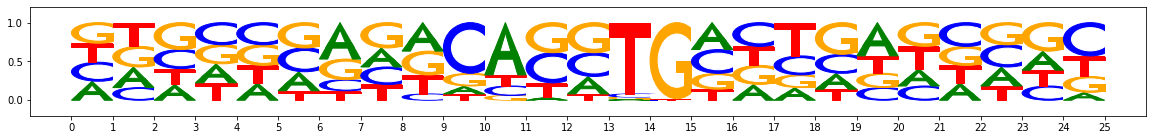

metacluster_1 pattern_1
total seqlets: 47
Task 0 hypothetical scores:


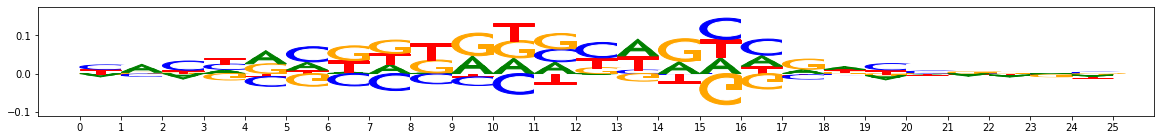

Task 0 actual importance scores:


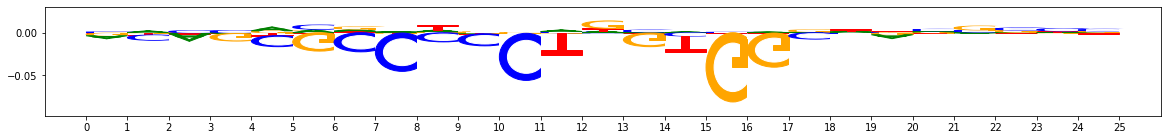

onehot, fwd and rev:


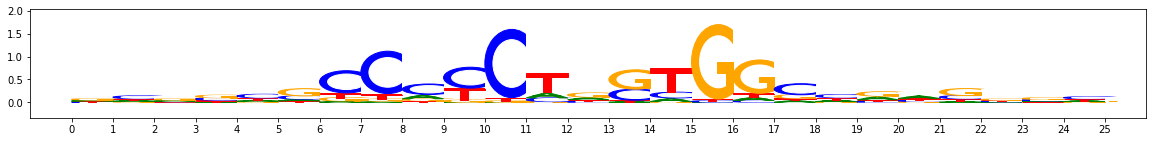

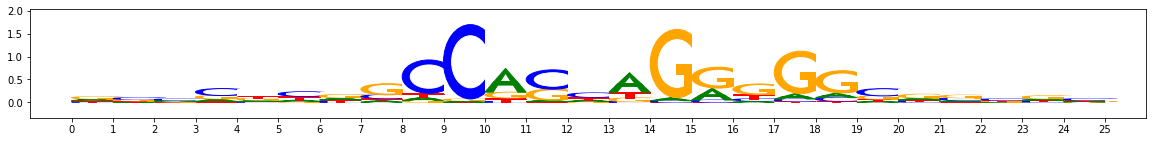

PLOTTING SUBCLUSTERS


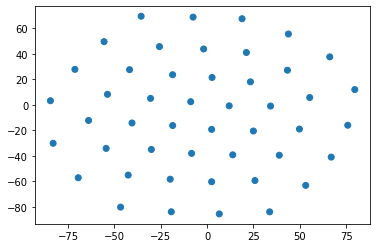

subcluster_0 size 47


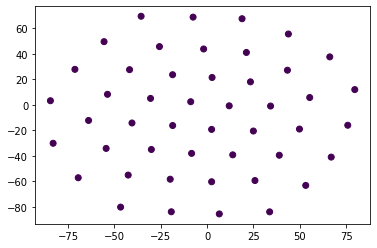

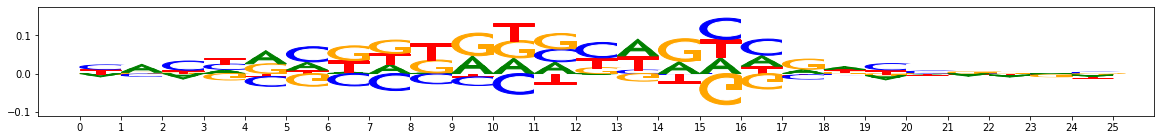

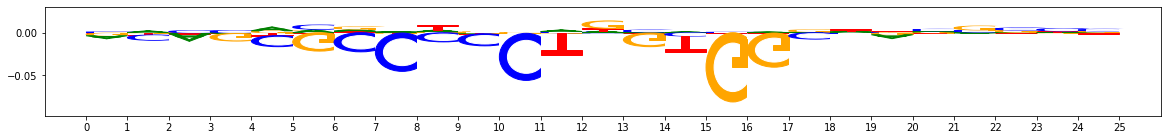

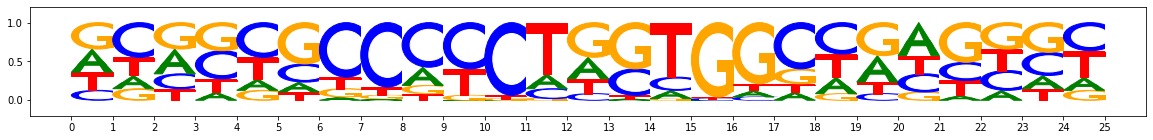

metacluster_1 pattern_2
total seqlets: 45
Task 0 hypothetical scores:


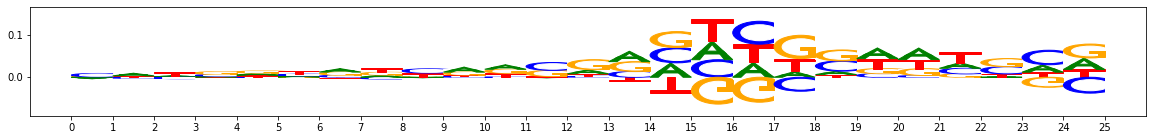

Task 0 actual importance scores:


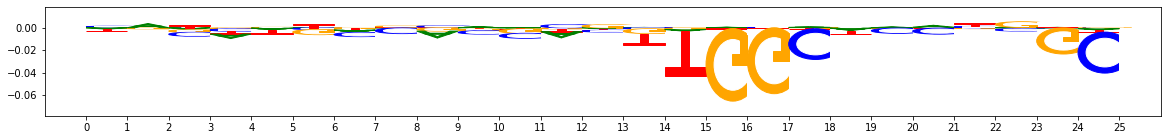

onehot, fwd and rev:


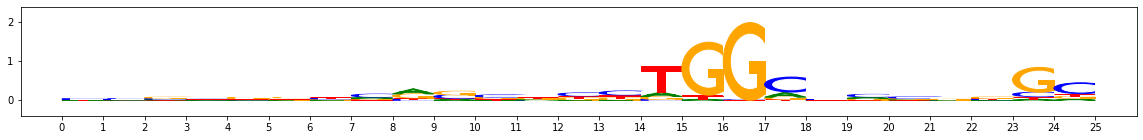

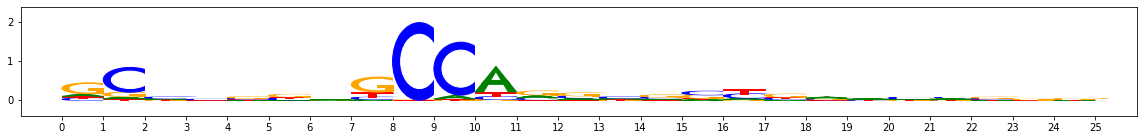

PLOTTING SUBCLUSTERS


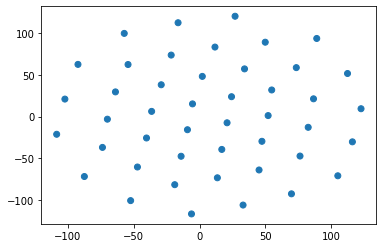

subcluster_0 size 45


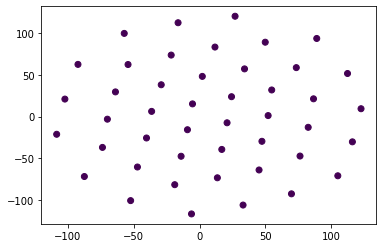

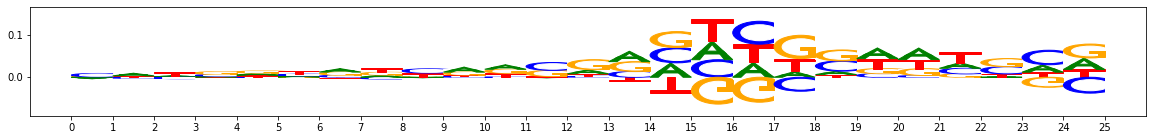

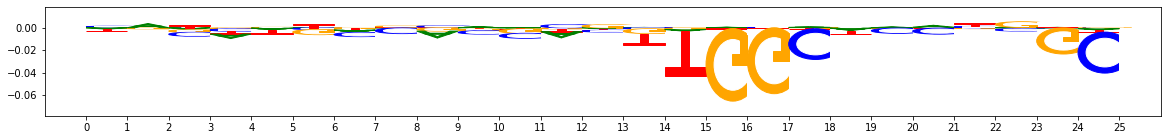

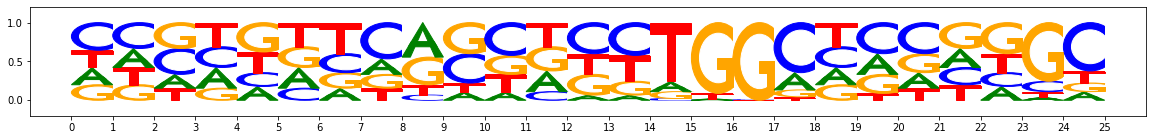

metacluster_1 pattern_3
total seqlets: 33
Task 0 hypothetical scores:


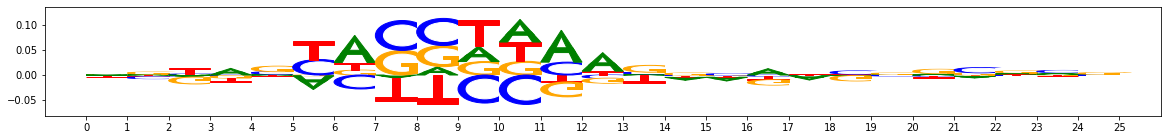

Task 0 actual importance scores:


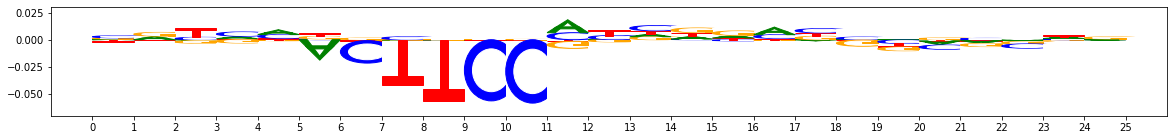

onehot, fwd and rev:


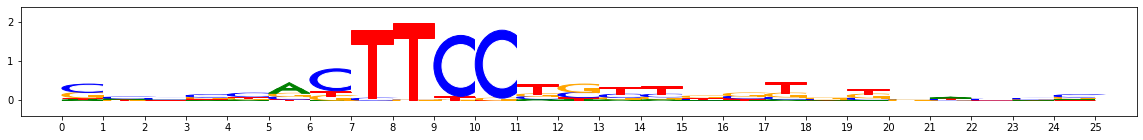

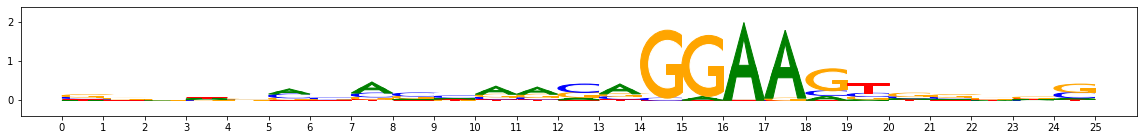

PLOTTING SUBCLUSTERS


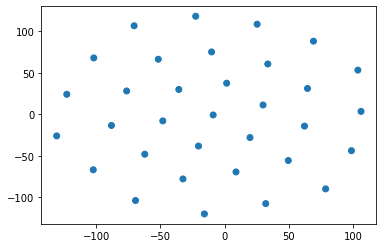

subcluster_0 size 33


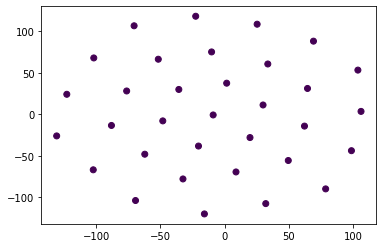

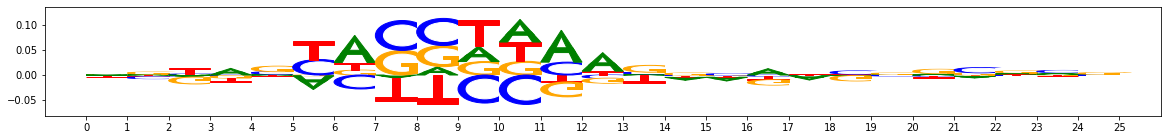

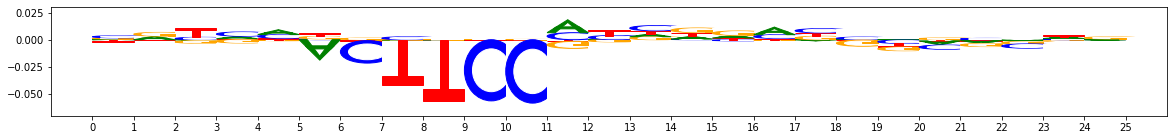

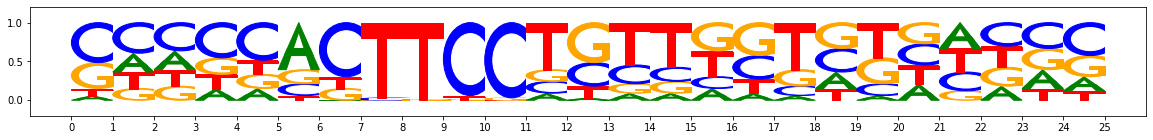

metacluster_1 pattern_4
total seqlets: 32
Task 0 hypothetical scores:


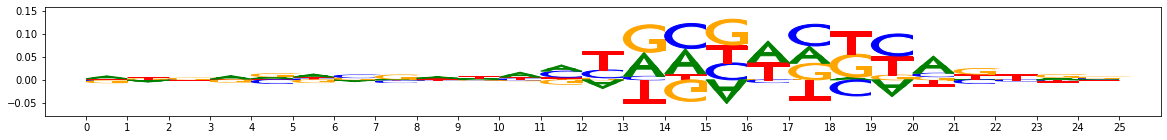

Task 0 actual importance scores:


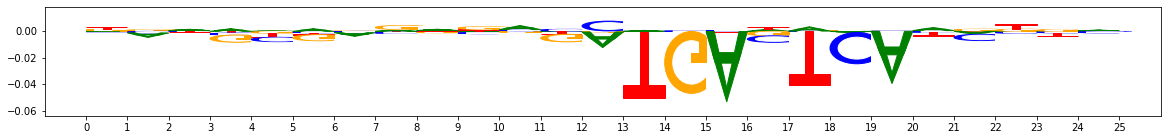

onehot, fwd and rev:


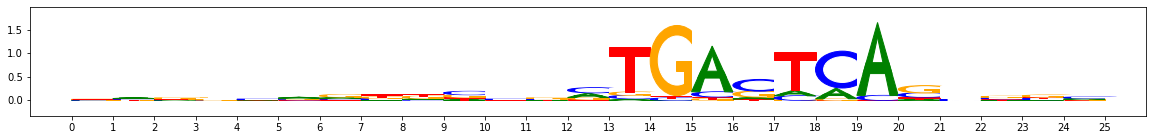

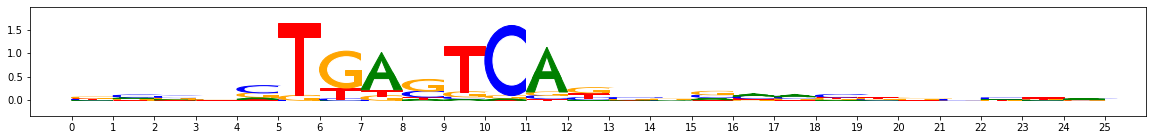

PLOTTING SUBCLUSTERS


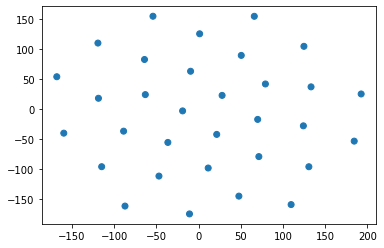

subcluster_0 size 32


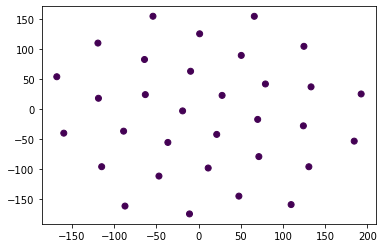

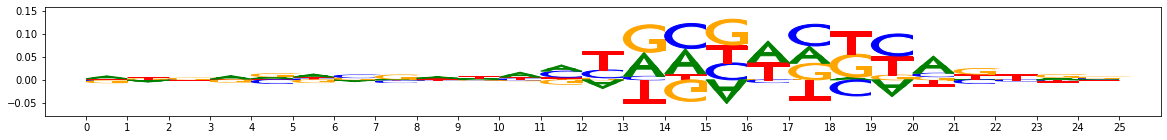

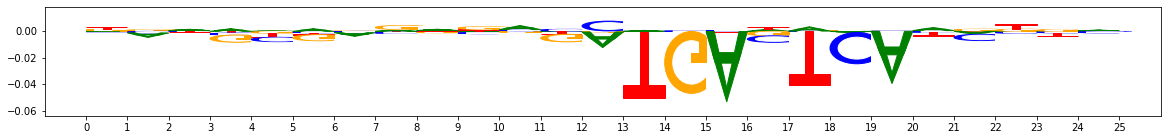

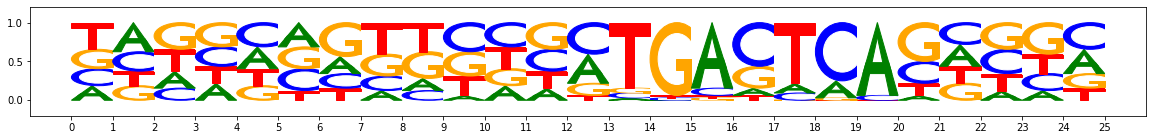

metacluster_1 pattern_5
total seqlets: 32
Task 0 hypothetical scores:


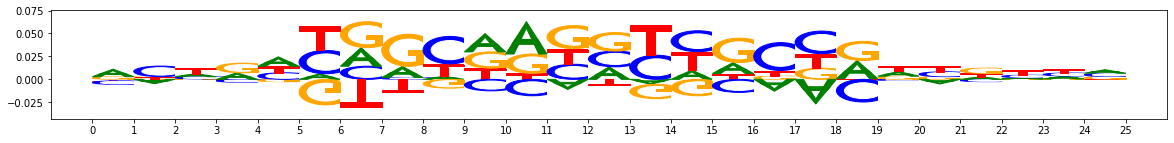

Task 0 actual importance scores:


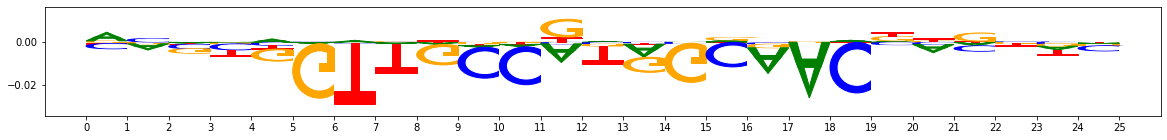

onehot, fwd and rev:


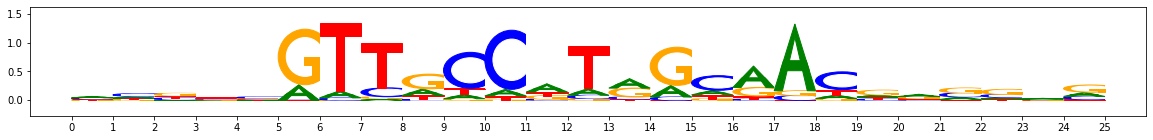

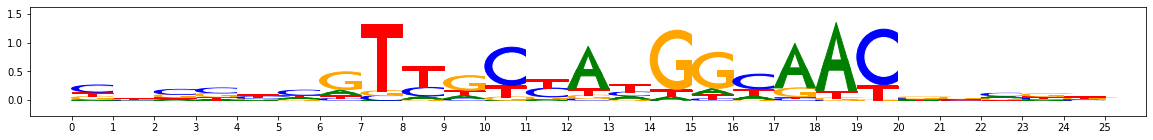

PLOTTING SUBCLUSTERS


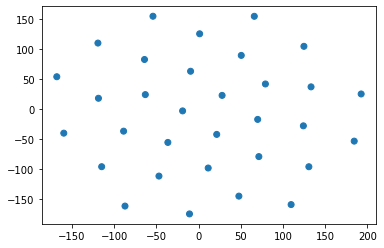

subcluster_0 size 32


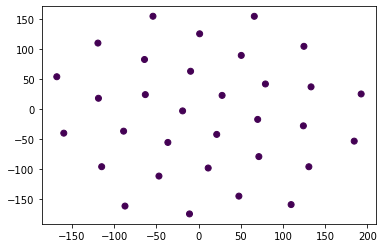

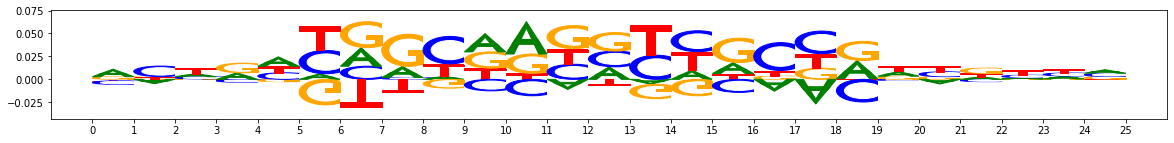

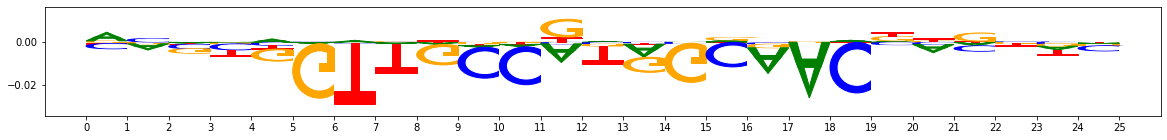

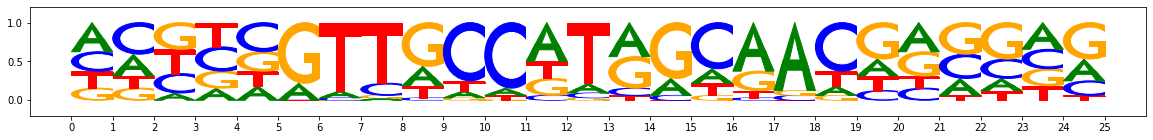

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 53
Task 0 hypothetical scores:


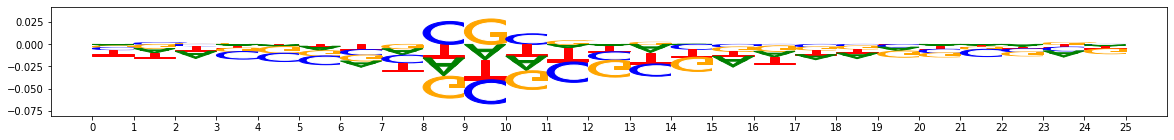

Task 0 actual importance scores:


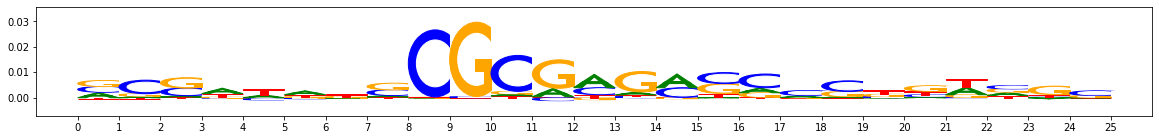

onehot, fwd and rev:


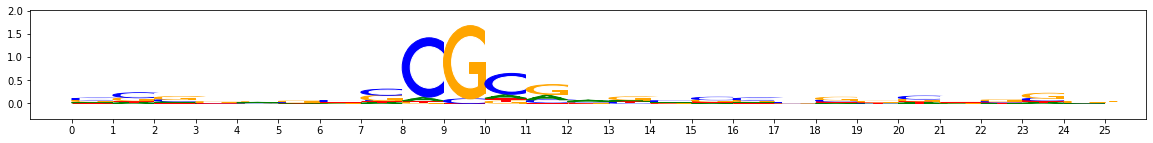

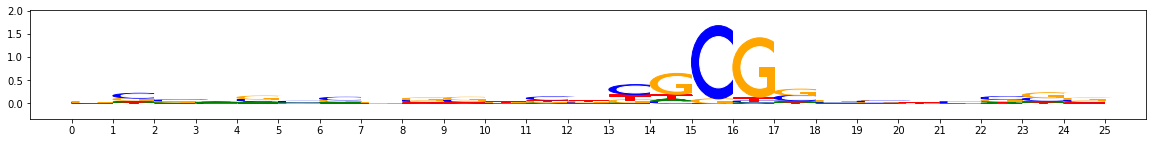

PLOTTING SUBCLUSTERS


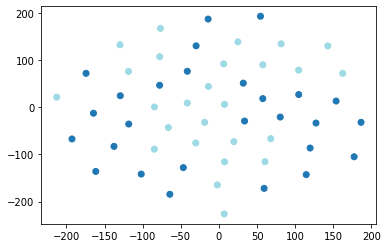

subcluster_0 size 27


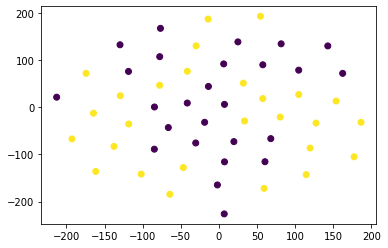

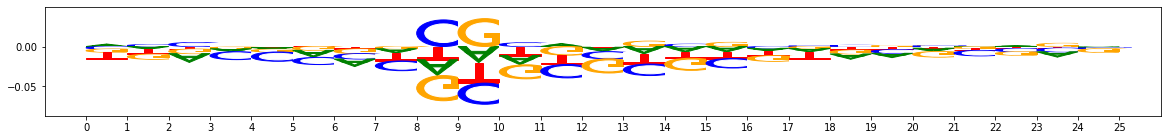

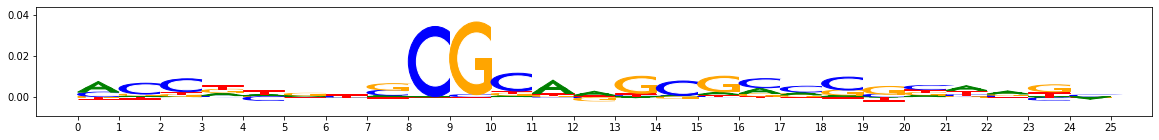

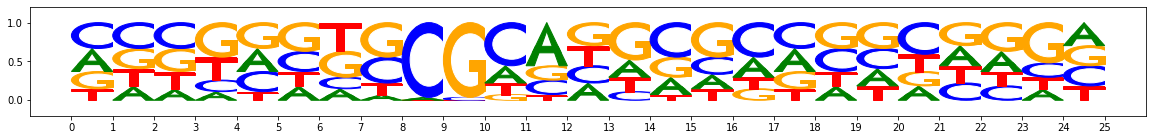

subcluster_1 size 26


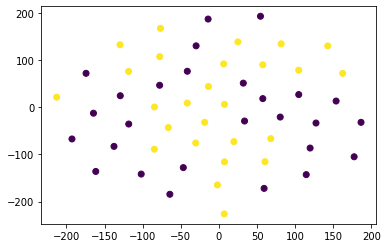

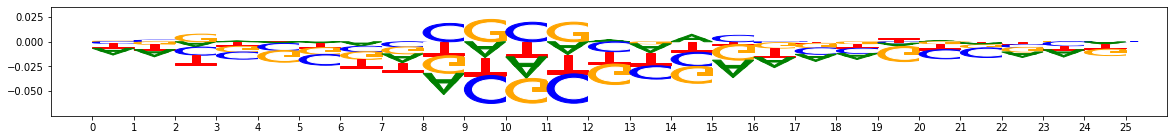

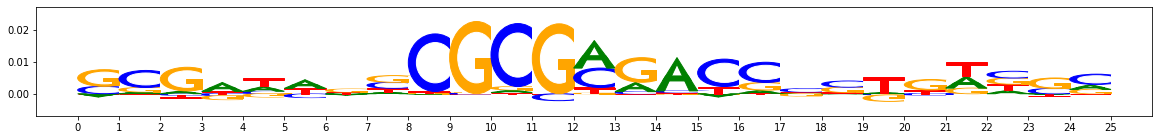

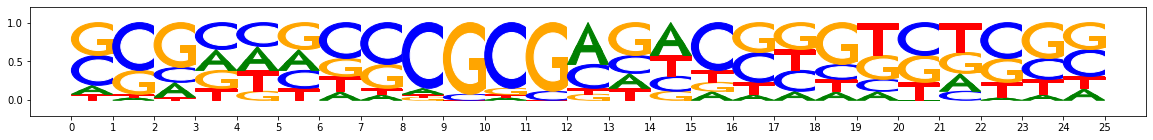

metacluster_0 pattern_1
total seqlets: 45
Task 0 hypothetical scores:


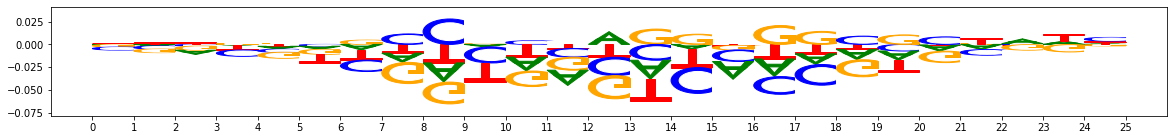

Task 0 actual importance scores:


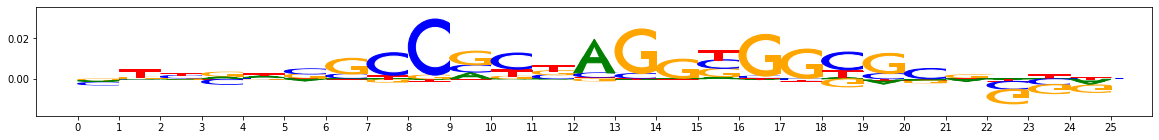

onehot, fwd and rev:


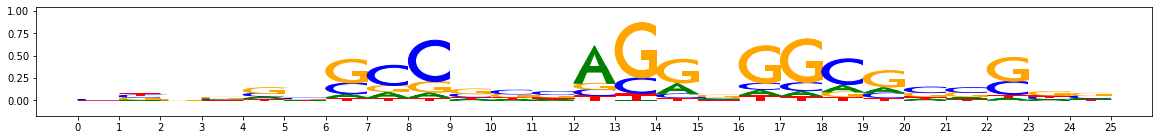

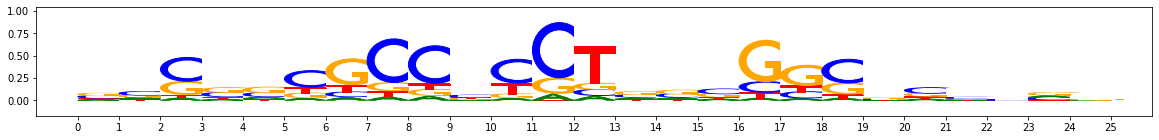

PLOTTING SUBCLUSTERS


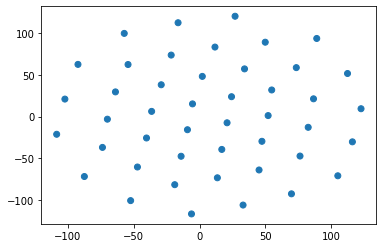

subcluster_0 size 45


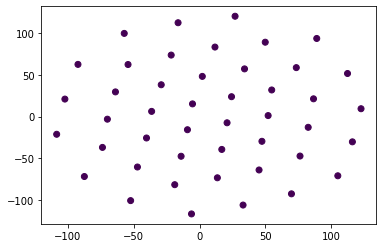

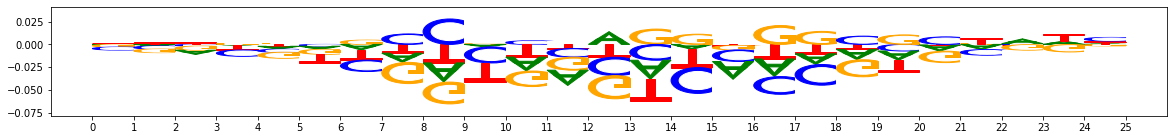

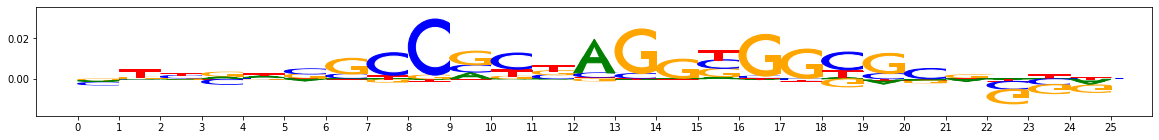

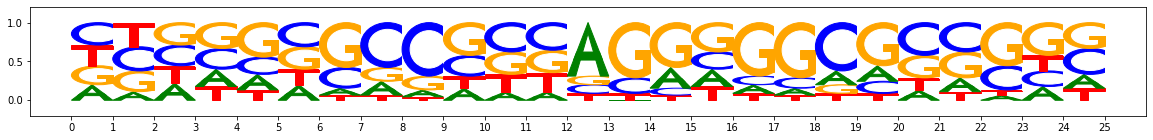

metacluster_0 pattern_2
total seqlets: 38
Task 0 hypothetical scores:


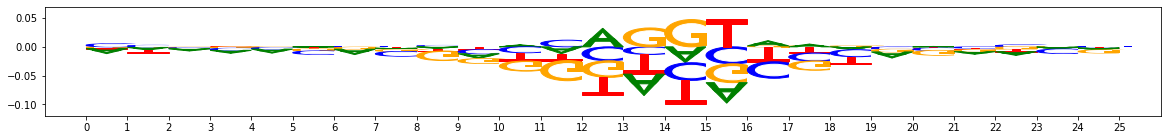

Task 0 actual importance scores:


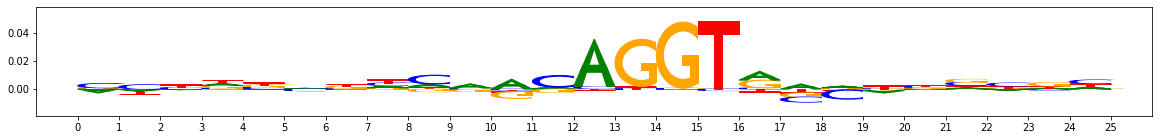

onehot, fwd and rev:


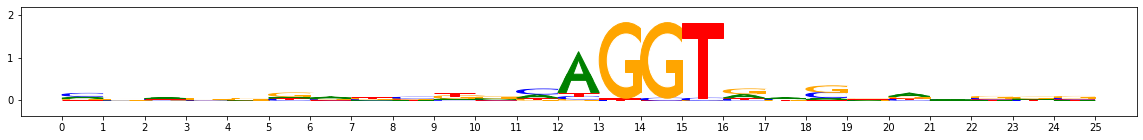

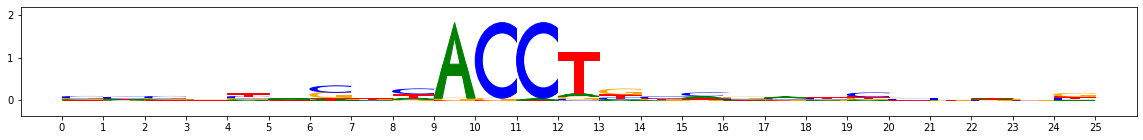

PLOTTING SUBCLUSTERS


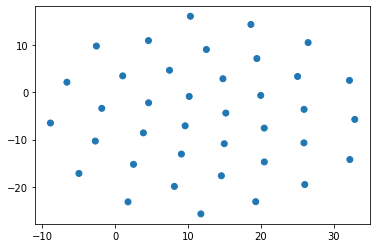

subcluster_0 size 38


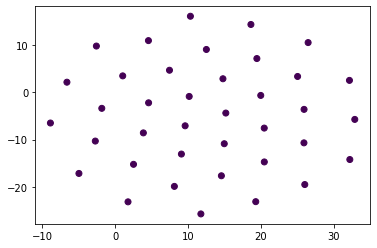

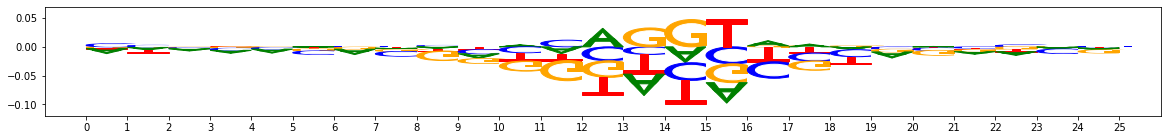

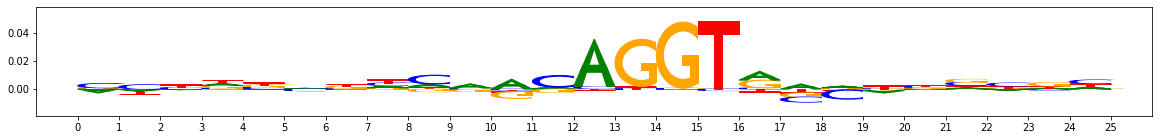

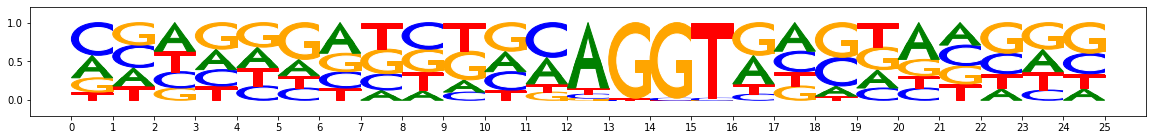

metacluster_0 pattern_3
total seqlets: 36
Task 0 hypothetical scores:


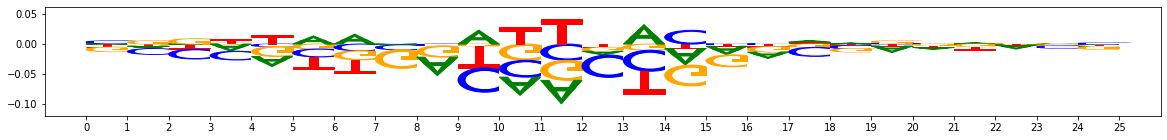

Task 0 actual importance scores:


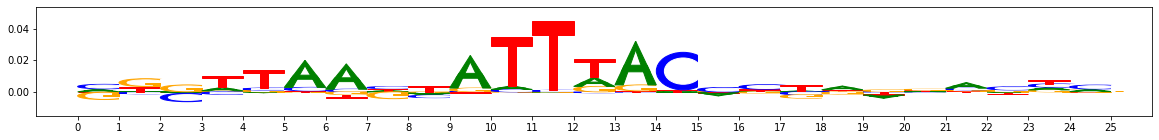

onehot, fwd and rev:


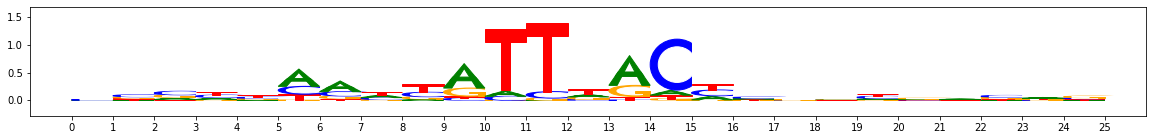

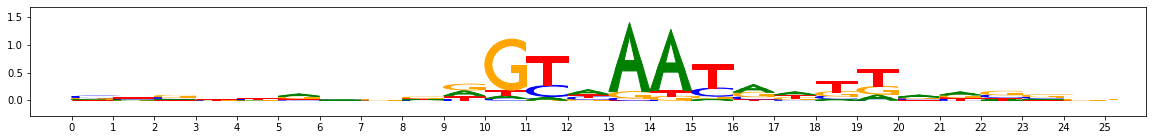

PLOTTING SUBCLUSTERS


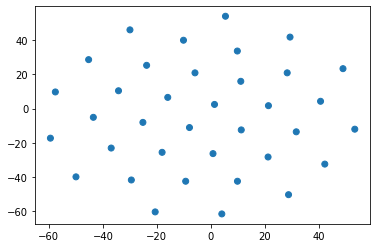

subcluster_0 size 36


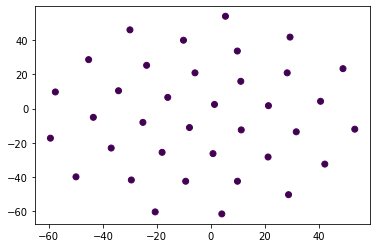

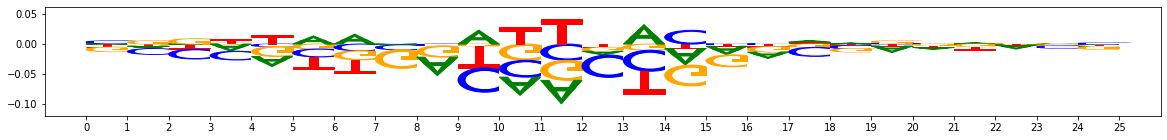

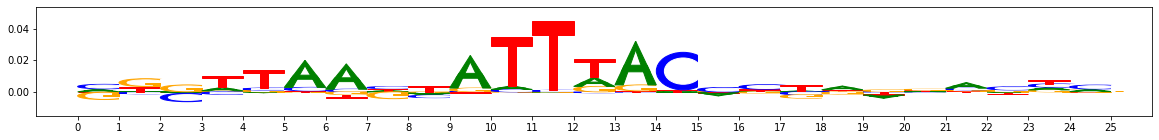

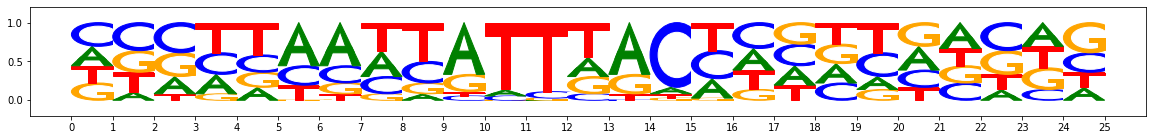

metacluster_0 pattern_4
total seqlets: 35
Task 0 hypothetical scores:


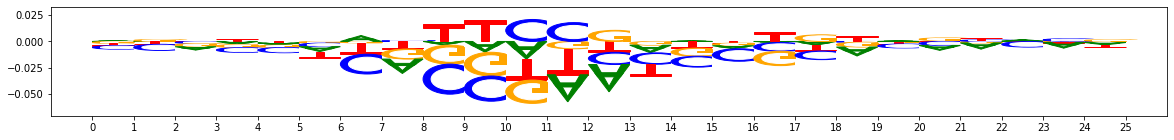

Task 0 actual importance scores:


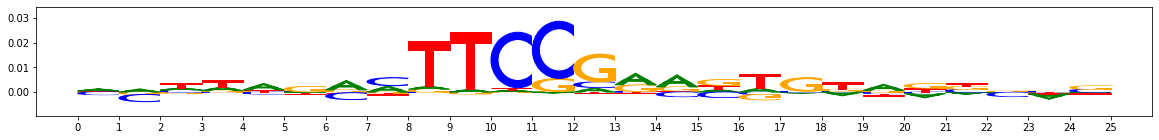

onehot, fwd and rev:


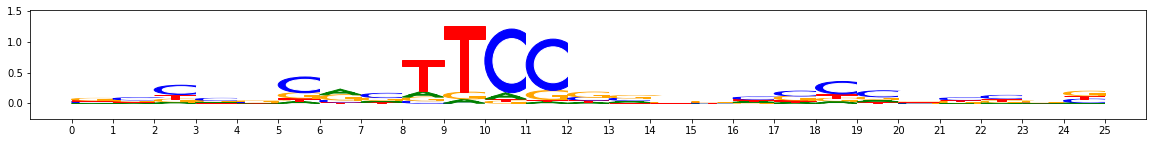

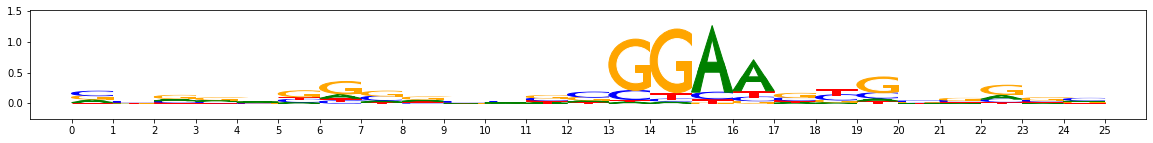

PLOTTING SUBCLUSTERS


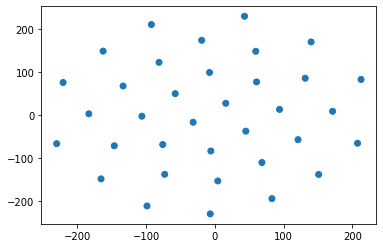

subcluster_0 size 35


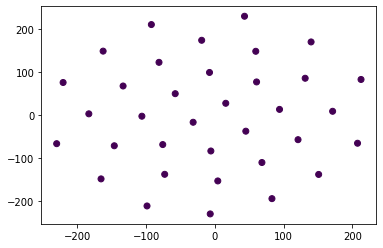

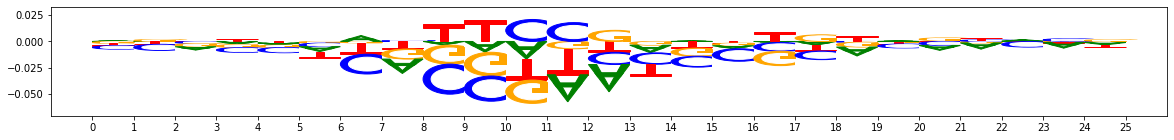

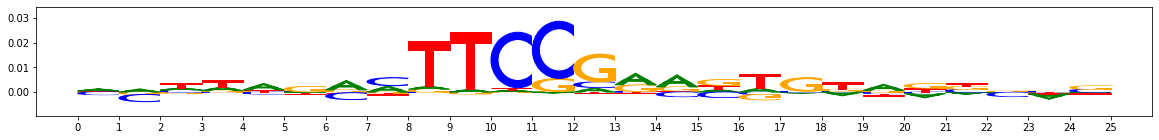

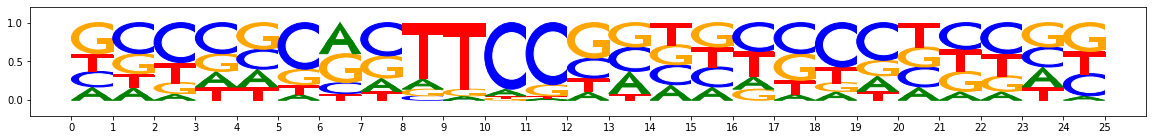

metacluster_0 pattern_5
total seqlets: 32
Task 0 hypothetical scores:


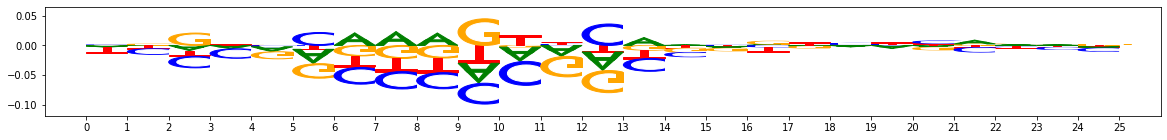

Task 0 actual importance scores:


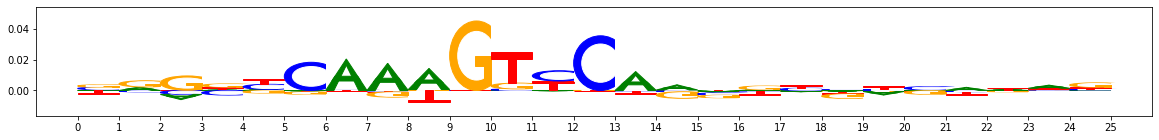

onehot, fwd and rev:


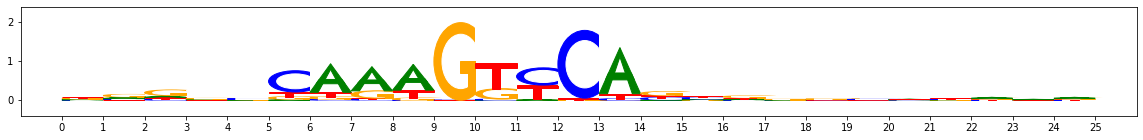

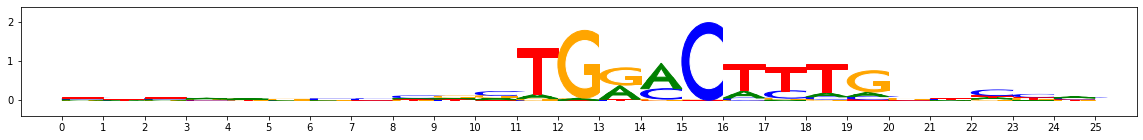

PLOTTING SUBCLUSTERS


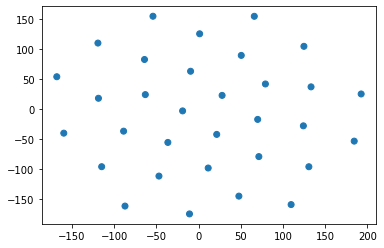

subcluster_0 size 32


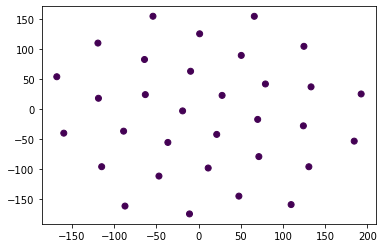

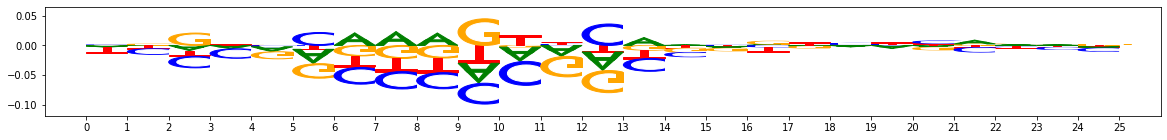

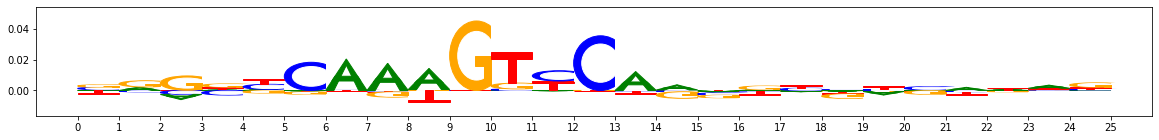

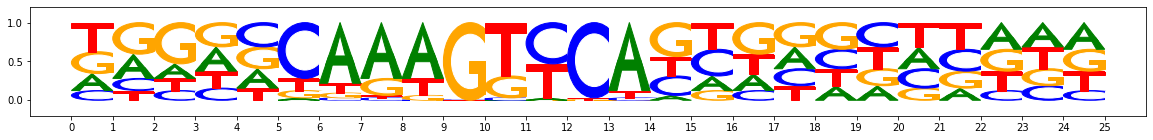

metacluster_0 pattern_6
total seqlets: 31
Task 0 hypothetical scores:


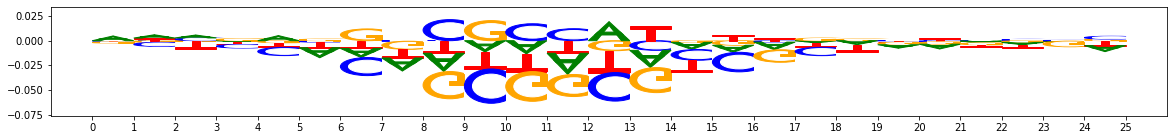

Task 0 actual importance scores:


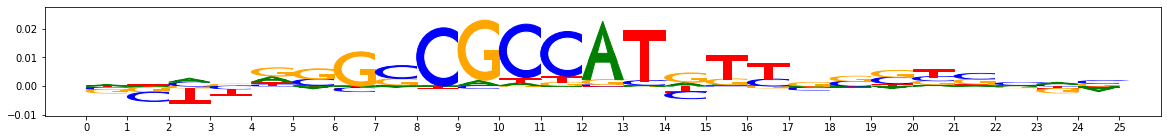

onehot, fwd and rev:


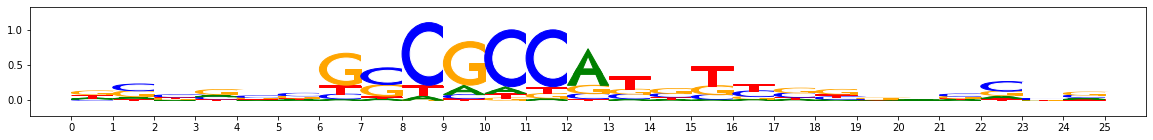

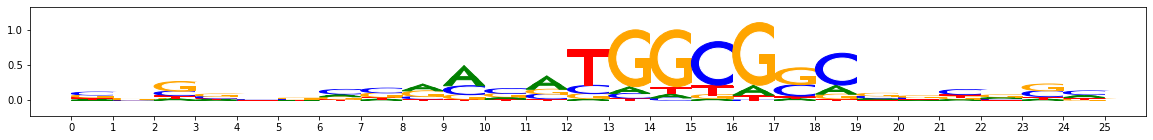

PLOTTING SUBCLUSTERS


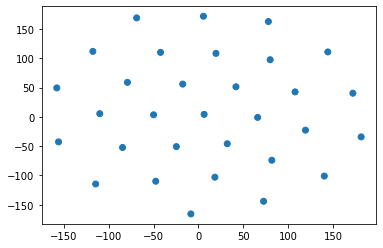

subcluster_0 size 31


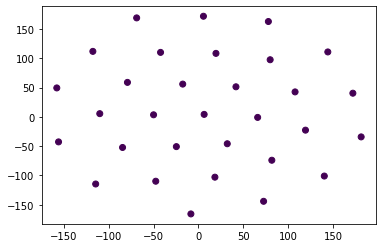

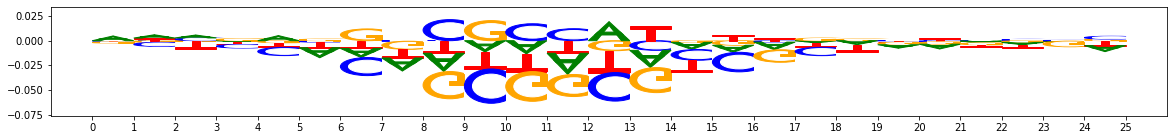

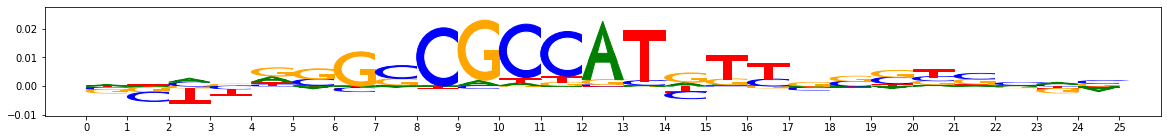

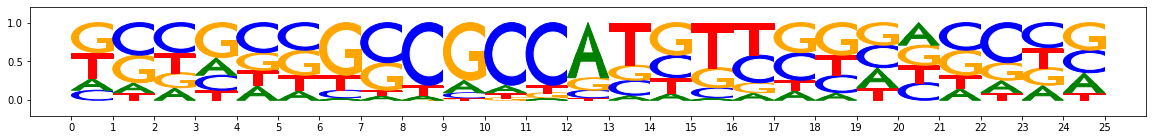

metacluster_0 pattern_7
total seqlets: 31
Task 0 hypothetical scores:


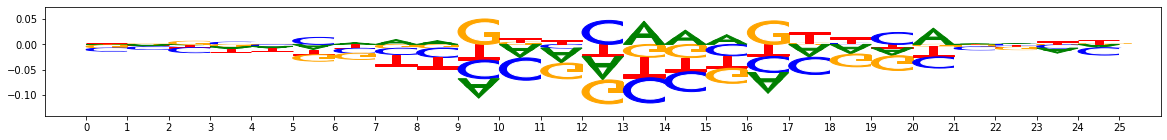

Task 0 actual importance scores:


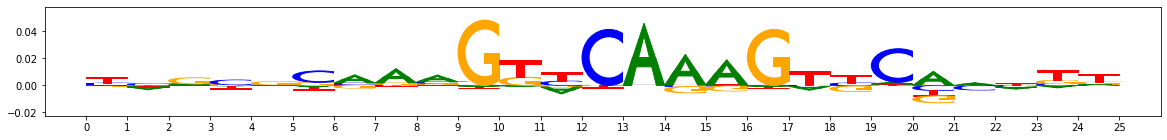

onehot, fwd and rev:


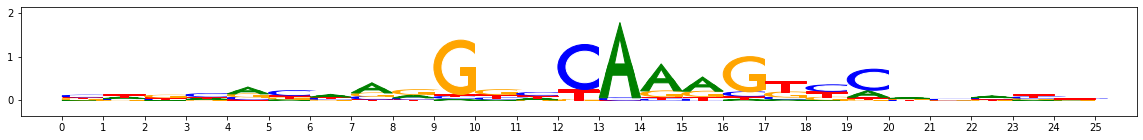

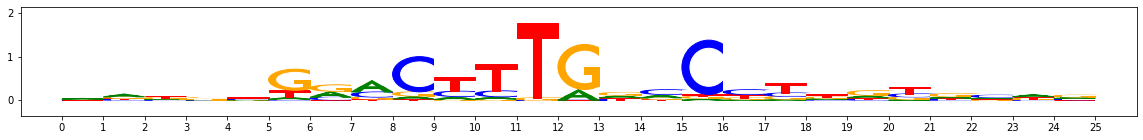

PLOTTING SUBCLUSTERS


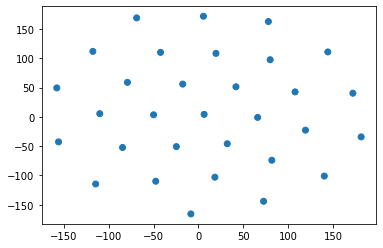

subcluster_0 size 31


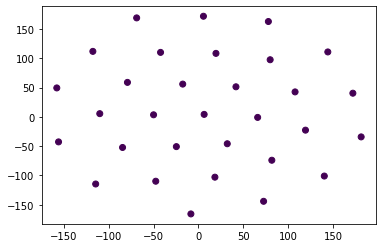

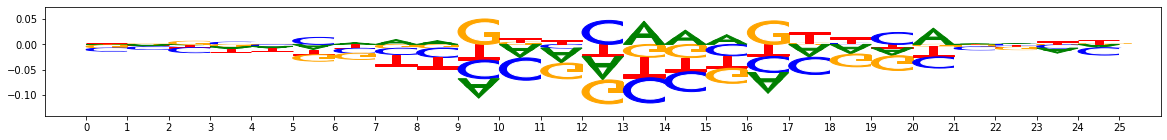

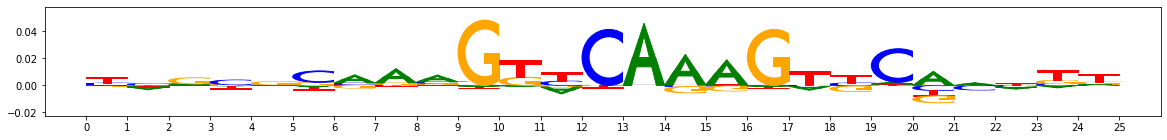

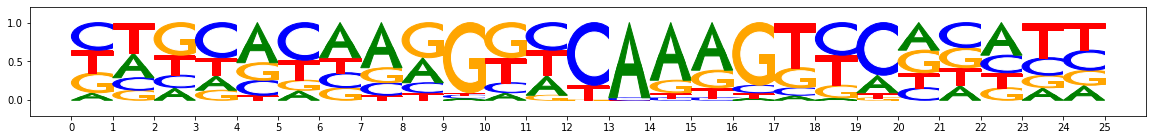

metacluster_0 pattern_8
total seqlets: 30
Task 0 hypothetical scores:


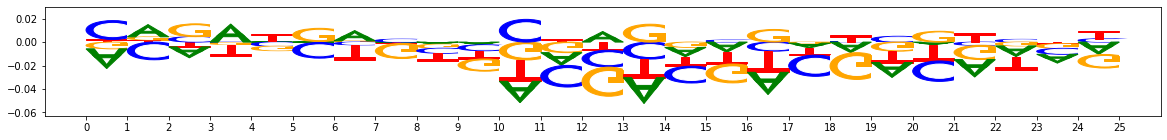

Task 0 actual importance scores:


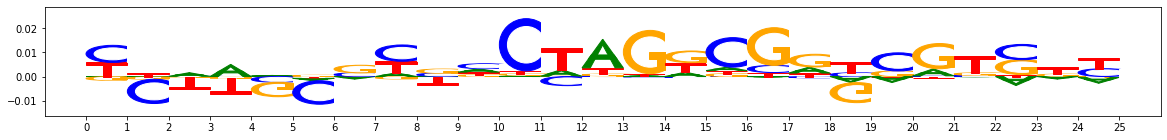

onehot, fwd and rev:


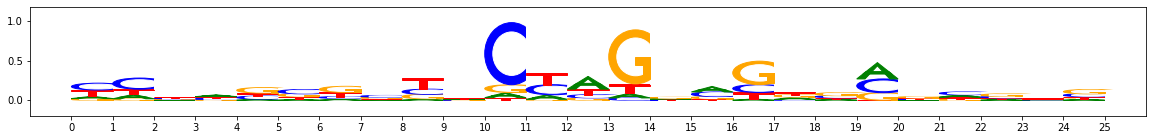

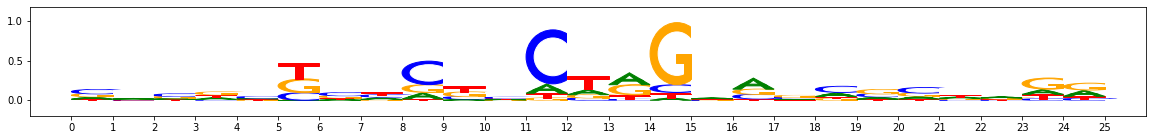

PLOTTING SUBCLUSTERS


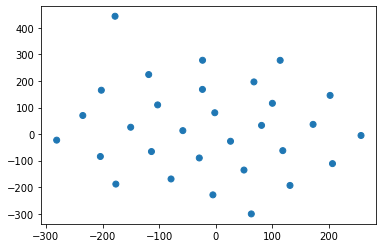

subcluster_0 size 30


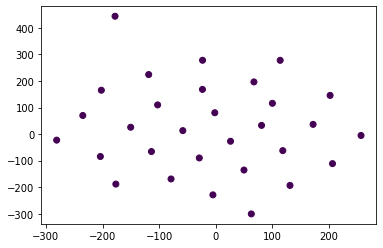

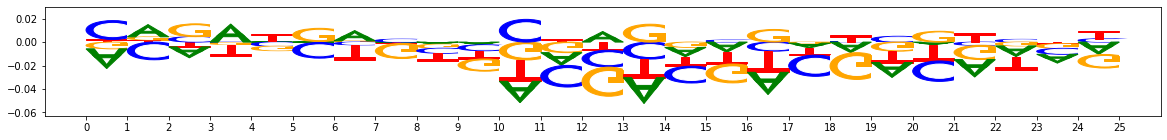

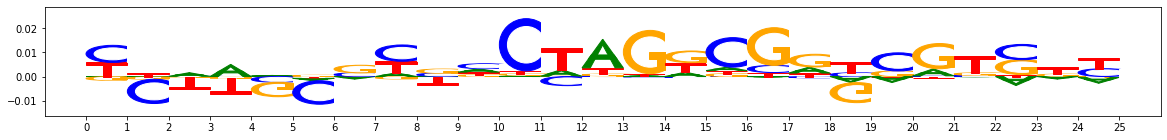

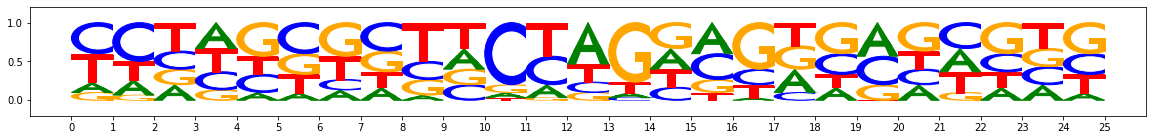

In [14]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names[::-1]:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        #print("Task 1 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"]["fwd"])
        #print("Task 1 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        #print("Task 2 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"]["fwd"])
        #print("Task 2 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        if ("subclusters" in pattern):
            print("PLOTTING SUBCLUSTERS")
            subclusters = np.array(pattern["subclusters"])
            twod_embedding = np.array(pattern["twod_embedding"])
            plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=subclusters, cmap="tab20")
            plt.show()
            for subcluster_name in list(pattern["subcluster_to_subpattern"]["subcluster_names"]):
                subpattern = pattern["subcluster_to_subpattern"][subcluster_name]
                print(subcluster_name.decode("utf-8"), "size", len(subpattern["seqlets_and_alnmts"]["seqlets"]))
                subcluster = int(subcluster_name.decode("utf-8").split("_")[1])
                plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=(subclusters==subcluster))
                plt.show()
                viz_sequence.plot_weights(subpattern["task0_hypothetical_contribs"]["fwd"])
                viz_sequence.plot_weights(subpattern["task0_contrib_scores"]["fwd"])
                viz_sequence.plot_weights(subpattern["sequence"]["fwd"])
hdf5_results.close()